<a href="https://colab.research.google.com/github/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/L07b_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L07b- Transformer

   - Developed by **Armin Norouzi**
   - Compatible with Google Colaboratory


**Table of Contents:**
1.  Intorduction to Transformer
2.  Tensorflow implementation of Transformer


# 1. Intorduction to Transformer
# 1.1. Generative Adversarial Network vs Transformer:

In the previous section, we learn what GAN is and how it works. Now let's see what is transformers and why we need such a thing.

We learned GAN is a type of neural network that consists of two networks, a **generator** and a **discriminator**. The generator tries to create new data samples that are similar to the input data, while the discriminator tries to distinguish between the real and fake data samples. The two networks are trained together in a way that the generator learns to create more realistic samples while the discriminator gets better at distinguishing between the real and fake samples.

On the other hand, the **Transformer** is a type of neural network architecture that was introduced in the field of natural language processing (NLP). It is mainly used for tasks such as **language translation**, **text summarization**, and **language modelling**. The Transformer model consists of an **encoder** and a **decoder** that work together to process input sequences and generate output sequences. The encoder processes the input sequence and produces a hidden representation of the input. The decoder then takes the hidden representation and generates the output sequence. The Transformer uses a **self-attention mechanism** that allows the model to focus on different parts of the input sequence while processing it. Additionally, the Transformer uses a **positional encoding technique** to preserve the order of the input sequence, which is important for language tasks.

While both models are used for different tasks, they do share some similarities. Both GAN and Transformer are deep learning models that are based on neural networks and use backpropagation to train their parameters. Additionally, they both have been used for generating realistic images and natural language text.

However, the key difference between the two models is that GAN is used for generative tasks, while the Transformer is used for tasks related to natural language processing. **GANs generate new samples, while Transformers transform input sequences into output sequences.**

# 1.2. We have RNN and LSTM; why do we need transformers?

While RNNs and LSTMs are powerful models that have been used successfully in many natural language processing tasks, they have certain limitations that can make them less effective for certain tasks. Here are a few reasons why Transformers have emerged as an important alternative to RNNs and LSTMs:

- **Long-term dependencies:** RNNs and LSTMs are designed to capture sequential dependencies in data, which makes them well-suited for modeling time-series data or sequences of variable length. However, they can struggle to capture long-term dependencies in data, particularly when the distance between the relevant elements in the sequence is large. Transformers are designed to explicitly model long-range dependencies using self-attention mechanisms, which allow them to attend to different parts of the input sequence and capture long-term relationships.

- **Parallelization:** RNNs and LSTMs process data sequentially, which can make them slower and more computationally expensive than other models. Transformers, on the other hand, can process the entire input sequence in parallel, which makes them more efficient and faster to train. This is particularly important for large-scale natural language processing tasks that involve processing large amounts of data.

- **Handling variable-length inputs:** RNNs and LSTMs are designed to handle input sequences of variable length, but they can struggle with very long sequences or sequences that contain significant amounts of noise or irrelevant information. Transformers are better suited for handling variable-length inputs and can effectively filter out noise or irrelevant information using their attention mechanisms.

- **Attention-based mechanisms:** Transformers are designed to use attention-based mechanisms, which allow them to dynamically focus on different parts of the input sequence based on the context of the task. This makes them particularly well-suited for tasks that require the model to selectively attend to different parts of the input sequence, such as machine translation or question answering.

## 1.2. Transformer components

We briefly talked about the transformer component; let's dive into it in more detail.

![picture](https://github.com/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/figures/transformers.png?raw=true) Source: [1-2]

This figure shows transformers architecture schematically. The Transformer architecture consists of an encoder and decoder, which are composed of multiple layers that use attention and self-attention mechanisms to process the input and output sequences. The positional encoding technique is used to encode the position of tokens in the input sequence. These components work together to enable the Transformer to achieve state-of-the-art performance on various natural language processing tasks.

- **Encoder:** The encoder is the part of the Transformer architecture that processes the input sequence and produces a hidden representation of the sequence. The input sequence is first transformed into a sequence of embeddings, which are then fed into a stack of identical layers. Each layer in the encoder stack consists of two sublayers: a self-attention layer and a feedforward layer. The self-attention layer allows the encoder to attend to different parts of the input sequence and capture long-range dependencies, while the feedforward layer applies a nonlinear transformation to the hidden representation.

- **Decoder:** The decoder is the part of the Transformer architecture that generates the output sequence based on the hidden representation produced by the encoder. Like the encoder, the decoder also consists of a stack of identical layers, but each layer has three sublayers: a self-attention layer, an encoder-decoder attention layer, and a feedforward layer. The self-attention layer allows the decoder to attend to different parts of the output sequence, while the encoder-decoder attention layer allows the decoder to attend to different parts of the input sequence.

- **Attention:** Attention is a mechanism in neural networks that allows the model to selectively attend to different parts of the input when making a prediction. In the Transformer architecture, attention is used in both the encoder and decoder. The attention mechanism calculates a weighted sum of the values of the input sequence, where the weights are determined by the similarity between the query and the keys. The attention mechanism allows the model to focus on different parts of the input sequence depending on the task at hand.

- **Self-Attention Mechanism:** Self-attention is a specific type of attention mechanism that is used in the Transformer architecture. In self-attention, the input sequence is transformed into a sequence of query, key, and value vectors. The query vectors are used to calculate the attention weights for each position in the input sequence, based on the similarity between the query vector and the key vectors. The value vectors are then weighted by the attention weights and summed up to produce a weighted representation of the input sequence. This weighted representation is then used as the input for the next layer of the model. Self-attention allows the model to attend to different parts of the input sequence and capture long-range dependencies.

- **Positional Encoding:** Positional encoding is a technique used in the Transformer architecture to encode the position of the tokens in the input sequence. Since the Transformer does not have a recurrence or convolutional structure that can capture the order of the input sequence, the positional encoding is added to each token's embedding to provide the model with information about the position of the token in the sequence. The positional encoding is calculated using a fixed function that takes into account the position of the token in the sequence and the dimension of the embedding. The result is then added to the token's embedding, allowing the model to differentiate between tokens that appear in different positions in the input sequence.


For learning how these componenet working in a big picture, I refer you to [Google AI Blog post](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html):

> Neural networks for machine translation typically contain an encoder reading the input sentence and generating a representation of it. A decoder then generates the output sentence word by word while consulting the representation generated by the encoder. The Transformer starts by generating initial representations, or embeddings, for each word... Then, using self-attention, it aggregates information from all of the other words, generating a new representation per word informed by the entire context, represented by the filled balls. This step is then repeated multiple times in parallel for all words, successively generating new representations.

<img src="https://www.tensorflow.org/images/tutorials/transformer/apply_the_transformer_to_machine_translation.gif" alt="Applying the Transformer to machine translation">

Applying the Transformer to machine translation. Source: [Google AI Blog](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html).


Now let's dive into the code. I used most of these codes based on official tutorials from Tensorflow. I suggest going through that if you are more experienced in the machine learning world. I changed it slightly to explain the codes better so I can understand and teach!

You can find tutorials here: [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer)



# 2. Tensorflow implementation of Transformer
## 2.1. Setting environement and Training data prepration

First let's import the necessary libraries for building and training a transformer model

In [2]:
!pip install -q -U tensorflow-text tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 71.0 MB/s eta 0:00:00


In [3]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

Let's donwload  TED Talks dataset for [Portuguese-to-English translation using TensorFlow Datasets (TFDS)](https://www.tensorflow.org/datasets/catalog/ted_hrlr_translate#ted_hrlr_translatept_to_en):

The `tfds.load()` function is used to load the dataset. The arguments passed to the function are:

- `'ted_hrlr_translate/pt_to_en':` This specifies the name of the dataset to load, which is the TED Talks dataset for Portuguese-to-English translation.
- `with_info=True:` This specifies that additional metadata about the dataset should be returned along with the dataset itself.
- `as_supervised=True:` This specifies that the dataset should be returned as a tuple of (input, target) pairs, where input is a Portuguese sentence and target is the corresponding English translation.

In [6]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en',
                               with_info=True,
                               as_supervised=True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteN7TOKT/ted_hrlr_translate-trai…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteN7TOKT/ted_hrlr_translate-vali…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteN7TOKT/ted_hrlr_translate-test…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


Let's print out the first batch of examples from the Portuguese-to-English translation dataset loaded using TensorFlow Datasets (TFDS).

The `train_examples.batch(3).take(1)` function call batches the dataset into groups of three examples and then takes the first batch. This means that the code will print out the first three examples in the dataset.

The code then loops over the examples in the batch and prints out each example in both Portuguese and English. The `.decode('utf-8')` function call is used to convert the byte strings in the dataset to human-readable text.

In [7]:
for pt_examples, en_examples in train_examples.batch(3).take(1):
  print('> Examples in Portuguese:')
  for pt in pt_examples.numpy():
    print(pt.decode('utf-8'))
  print()

  print('> Examples in English:')
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

> Examples in Portuguese:
e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .

> Examples in English:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


## 2.2. Set up the tokenizer

Now time to tokenize our text.

Let's download and load the tokenizers used for the Portuguese-to-English translation model provided by TensorFlow.

This tutorial follows main tuterial from [tensorflow website](https://www.tensorflow.org/text/tutorials/transformer) and uses the tokenizers built in the [subword tokenizer](https://www.tensorflow.org/text/guide/subwords_tokenizer) tutorial. That tutorial optimizes two `text.BertTokenizer` objects (one for English, one for Portuguese) for **this dataset** and exports them in a TensorFlow `saved_model` format.

The `tf.keras.utils.get_file()` function is used to download a zipped version of the tokenizers from the TensorFlow website. The first argument specifies the name of the downloaded file, while the second argument specifies the URL from which to download the file. The `cache_dir` argument specifies the directory in which to cache the downloaded file, while `cache_subdir` specifies the subdirectory in which to store the file. The extract argument specifies whether to extract the contents of the downloaded zip file.



In [8]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

184801/184801 [==============================] - 0s 0us/step


'./ted_hrlr_translate_pt_en_converter.zip'

Now we can use the `tf.saved_model.load()` function to load the tokenizers from the saved model. The `model_name` argument specifies the name of the saved model to load, which in this case is `ted_hrlr_translate_pt_en_converter`.

In [9]:
tokenizers = tf.saved_model.load(model_name)

The tokenize function is used to convert a group of strings into a batch of token IDs with padding. Prior to tokenization, the function splits punctuation, converts all letters to lowercase, and normalizes the input to Unicode format. However, since the input data has already been standardized, these steps are not apparent in the code. Let's check an exampple before and after tokenizer:

In [10]:
print('> This is a batch of strings:')
for en in en_examples.numpy():
  print(en.decode('utf-8'))

> This is a batch of strings:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


In [11]:

encoded = tokenizers.en.tokenize(en_examples)

print('> This is a padded-batch of token IDs:')
for row in encoded.to_list():
  print(row)

> This is a padded-batch of token IDs:
[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]


The `detokenize` method tries to transform the token IDs into text that can be easily read and understood by humans.

In [12]:
round_trip = tokenizers.en.detokenize(encoded)

print('> This is human-readable text:')
for line in round_trip.numpy():
  print(line.decode('utf-8'))

> This is human-readable text:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .


The lower level `lookup` method converts from token-IDs to token text:

In [13]:
print('> This is the text split into tokens:')
tokens = tokenizers.en.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ]>

Now let's take a closer look at data by ploting the distribution of token lengths.

First, an empty list called `lengths` is created to store the token lengths. Then, for each batch of 1024 examples in the training set, we can use the `tokenizers.pt.tokenize()` and `tokenizers.en.tokenize()` functions to tokenize the Portuguese and English examples, respectively. The `row_lengths()` function is then used to compute the number of tokens in each row of the tokenized data, and the resulting lengths are appended to the lengths list.

After processing all of the batches, the `np.concatenate()` function is used to concatenate all of the token lengths into a single numpy array called all_lengths. This array is then used to create a histogram of token lengths using the `plt.hist()` function.

In [14]:
lengths = []

for pt_examples, en_examples in train_examples.batch(1024):
  pt_tokens = tokenizers.pt.tokenize(pt_examples)
  lengths.append(pt_tokens.row_lengths())

  en_tokens = tokenizers.en.tokenize(en_examples)
  lengths.append(en_tokens.row_lengths())
  print('.', end='', flush=True)

all_lengths = np.concatenate(lengths)


...................................................

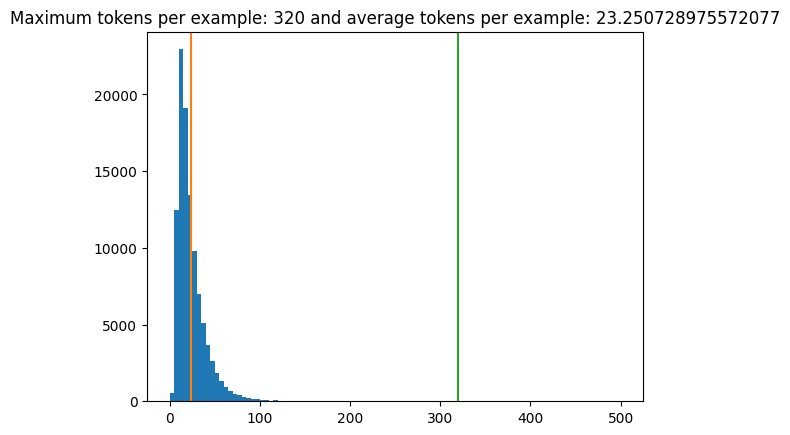

In [15]:
plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
avg_length = all_lengths.mean()
plt.plot([avg_length, avg_length], plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length} and average tokens per example: {avg_length}');

## 2.3. Set up a data pipeline

Let's write `prepare_batch()` function that prepares a batch of examples for training a machine translation model. The input to the function is a batch of Portuguese and English sentences, and the output is a tuple of two tensors representing the input and output sequences for the model.

First, the Portuguese sentences are tokenized using the `tokenizers.pt.tokenize()` method, which returns a ragged tensor representing the tokenized sentences. The code then trims the tensor to a maximum length of`MAX_TOKENS using the pt[:, :MAX_TOKENS]` syntax, which selects the first `MAX_TOKENS` tokens from each sentence. The resulting tensor is converted to a dense tensor with zero padding using the `pt.to_tensor()` method.

The English sentences are tokenized and trimmed in a similar way, but with an additional step. The `en[:, :(MAX_TOKENS+1)]` syntax selects the first `MAX_TOKENS+1` tokens from each sentence, which includes the start token [START] and end token [END]. The `en_inputs` tensor is created by selecting all but the last token from each sentence, which drops the end token. The `en_labels` tensor is created by selecting all but the first token from each sentence, which drops the start token.

Finally, the function returns a tuple of two tensors, `pt, en_inputs` and `en_labels`, which represent the input and output sequences for the machine translation model. These tensors can be used to train the model using techniques such as teacher forcing, where the model is trained to predict the next token in the output sequence given the input sequence and the ground truth output sequence up to that point.

In [16]:
MAX_TOKENS=128
def prepare_batch(pt, en):
    """
    Preprocess a batch of Portuguese and English sentences for training a machine translation model.

    Args:
        pt: A tensor of Portuguese sentences of shape (batch_size,) and dtype tf.string.
        en: A tensor of English sentences of shape (batch_size,) and dtype tf.string.

    Returns:
        A tuple of two tensors representing the input and output sequences for the model, and a tensor of shape
        (batch_size, max_length) representing the ground truth output sequences. The input sequence tensor has shape
        (batch_size, max_length) and dtype tf.int64, and the output sequence tensor has shape (batch_size, max_length)
        and dtype tf.int64.
    """
    pt = tokenizers.pt.tokenize(pt)      # Output is ragged.
    pt = pt[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    pt = pt.to_tensor()  # Convert to 0-padded dense Tensor

    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:, :-1].to_tensor()  # Drop the [END] tokens
    en_labels = en[:, 1:].to_tensor()   # Drop the [START] tokens

    return (pt, en_inputs), en_labels

Now let's take dataset and converted it into batches that are ready to be fed to the model.

The following function shuffles the examples in the dataset and batches them into batches of size `BATCH_SIZE`. It then applies the prepare_batch function to each batch, which tokenizes the text and prepares the input and output sequences for the model. Finally, it prefetches the batches to improve performance during training. The `BUFFER_SIZE` parameter determines the number of examples to load into memory for shuffling. The `tf.data.AUTOTUNE` argument allows TensorFlow to automatically tune the input pipeline for optimal performance.

In [17]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [18]:
def make_batches(ds):
  """
  This function takes a TensorFlow dataset 'ds' and processes it into batches that are ready to be fed to the model.

  Parameters:
  ds (tf.data.Dataset): TensorFlow dataset to be processed into batches

  Returns:
  tf.data.Dataset: Processed and batched TensorFlow dataset

  """
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

Let's see if we did everything write by testing dataset

In [21]:
# Create training and validation set batches.
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

for (pt, en), en_labels in train_batches.take(2):
  print(f'pt.shape: {pt.shape}')
  print(f'en_labels.shape: {en_labels.shape}')
  #break



pt.shape: (64, 97)
en_labels.shape: (64, 109)
pt.shape: (64, 85)
en_labels.shape: (64, 100)


In [30]:
print(pt)

tf.Tensor(
[[   2   95   40 ...    0    0    0]
 [   2  120   86 ...    0    0    0]
 [   2   44  115 ...    0    0    0]
 ...
 [   2  260 2125 ...    0    0    0]
 [   2   44   54 ...    0    0    0]
 [   2  121  107 ...    0    0    0]], shape=(64, 91), dtype=int64)


The function `make_batches` prepares `tf.data.Dataset` objects for training a Keras model. The model is expected to take input in the form of pairs of tokenized Portuguese and English sequences `(pt, en)`, and predict the English sequences shifted by one token. This is known as "teacher forcing" because at each timestep, the model receives the true value as input for the next timestep regardless of its previous output. This is a simple and efficient way to train a text generation model as the outputs can be computed in parallel.

While one might expect the `input, output` pairs to simply be the `Portuguese, English` sequences, this setup adds "context" to the model by conditioning it on the Portuguese sequence. It is possible to train a model without conditioning it on the Portuguese sequence, but that would require writing an inference loop and passing the model's output back to the input. This is slower and harder to learn but can result in a more stable model as the model has to learn to correct its own errors during training.

The `en` and `en_labels` are the same, just shifted by 1:

In [33]:
print(f'en[2][:10]: {en[4][:128]}')
print(f'en_labels[0][:10]: {en_labels[0][:10]}')

print(en[4].shape)

en[2][:10]: [   2  157   48  138 6014 4246   88   94  150   41  269 4286 1565 1682
   15    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
en_labels[0][:10]: [  72  101   74   81  126  162 2171   73  114   13]
(100,)


## 2.4. Define the components

### 2.4.1. The embedding and positional encoding layer

Both the encoder and decoder components use the same logic to convert input tokens to vectors. This is done using a `tf.keras.layers.Embedding` layer, which creates a vector representation for each token in the input sequence.

The attention layers in the model don't rely on the order of the tokens in the input sequence, because the model doesn't contain any recurrent or convolutional layers that would inherently capture the sequence order. Without a way to identify the word order, the model would see the input sequence as a "bag of words", where the order of the tokens doesn't matter. For example, the sequences "how are you", "how you are", and "you how are" would all be seen as identical by the model.

To overcome this issue, a Transformer model adds a "Positional Encoding" to the embedding vectors. The Positional Encoding uses a set of sines and cosines at different frequencies across the sequence. Each token in the input sequence has a unique positional encoding that captures its position in the sequence. The nearby tokens in the sequence will have similar positional encodings. By incorporating this information into the input representation, the model can maintain the sequential order of the input tokens and better understand the meaning of the sentence.

The formula for calculating the positional encoding is as follows:

$$\Large{PE_{(pos, 2i)} = \sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i / d_{model}})} $$

Now, let's implement it:

The `positional_encoding` function generates a matrix of position encodings for the input sequence. The purpose of positional encoding is to add information about the position of each token in the sequence, so that the self-attention mechanism in the transformer can distinguish between the different positions of the tokens.

The function takes two arguments: `length`, which specifies the length of the input sequence, and `depth`, which specifies the dimensionality of the encoding.

The function first creates two matrices: `positions` and `depths`. positions has shape `(length, 1)` and contains the indices of the positions in the input sequence. `depths` has shape `(1, depth/2)` and contains values ranging from `0` to `(depth/2)-1`, which are then normalized by `depth/2`.

The function then calculates the angle rates using the formula `1 / (10000**depths)`, which has shape `(1, depth/2)`. The angle rates are used to calculate the angle radians using the formula `positions * angle_rates`, which has shape `(length, depth/2)`.

Finally, the function concatenates the sine and cosine values of the angle radians along the last axis to create the position encoding matrix, which has shape `(length, depth)`. The resulting matrix is then cast to `tf.float32` and returned.

In [35]:
def positional_encoding(length, depth):
  """
  Generates a matrix of position encodings for an input sequence.

  Args:
      length: An integer representing the length of the input sequence.
      depth: An integer representing the dimensionality of the encoding.

  Returns:
      A `tf.Tensor` of shape `(length, depth)` representing the position encoding matrix.
  """
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

The position encoding function uses a series of sines and cosines that oscillate at various frequencies based on where they are positioned along the depth of the embedding vector. These oscillations occur across the position axis. Let's visualize it here:

(2048, 512)


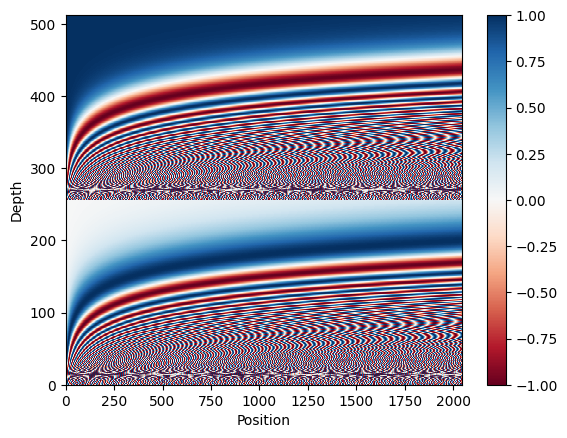

In [36]:
#@title
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

The purpose of this plot is to visualize the positional encoding matrix and see how it changes across different positions and depths in the sequence. It also helps to ensure that the encoding values are properly normalized and distributed across the matrix

Let's visualize the cosine similarity between the positional encoding vector at index 1000 and all other vectors in the positional encoding matrix.

The positional encoding vectors are first normalized using `L2` normalization. The code then calculates the dot product between the positional encoding vector at index 1000 and all other vectors in the matrix using the einsum function. The resulting dot products are plotted in a graph with the y-axis representing the cosine similarity values between the vectors.


(0.0, 1.0)

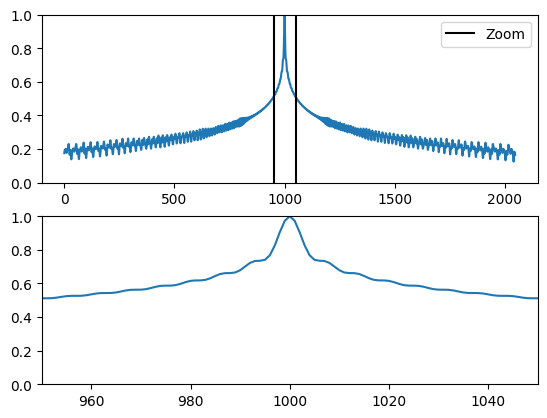

In [37]:
#@title
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])


The first plot shows the entire cosine similarity graph, while the second plot zooms in on the cosine similarity values between index 950 and 1050.

This visualization helps to illustrate how the positional encoding vectors encode the position information of each token in the sequence. The cosine similarity values are highest for vectors that are close to each other along the position axis, indicating that they have similar positional information.

Now let's put things togher and create `PositionEmbedding` class. This is a `tf.keras.layers.Layer` class that combines an embedding layer and a positional encoding layer to create a layer that can be used to encode input sequences in a transformer model.

The class takes two arguments: `vocab_size` which is the size of the vocabulary of the input sequences and `d_model` which is the size of the embedding and positional encoding vectors.

In the constructor, it creates an `Embedding` layer that maps input tokens to their corresponding embedding vectors, and a positional encoding matrix of shape `(max_length, d_model)` using the `positional_encoding` function.

The `compute_mask` method of this class returns a mask with the same shape as the input tensor to the embedding layer.

In the call method, the input tensor is first passed through the embedding layer, and then scaled by the square root of the `d_model` value. Then, the positional encoding matrix is added to the embedding output corresponding to each input token. Finally, the encoded input sequence is returned.

In [38]:
class PositionalEmbedding(tf.keras.layers.Layer):
  """
  This layer combines the input embedding with a positional encoding that helps the Transformer to understand
  the relative position of the tokens in a sequence. It takes an input sequence of tokens and converts it to
  a sequence of embedding vectors, then adds positional information to it.

  Attributes:
      vocab_size (int): The size of the vocabulary, i.e., the number of unique tokens in the input sequence.
      d_model (int): The number of dimensions in the embedding vector.

  Methods:
      compute_mask(*args, **kwargs): This method computes the mask to be applied to the embeddings.
      call(x): This method performs the computation for the layer.

  """
  def __init__(self, vocab_size, d_model):
    """
    Initializes the PositionalEmbedding layer.

    Args:
        vocab_size (int): The size of the vocabulary, i.e., the number of unique tokens in the input sequence.
        d_model (int): The number of dimensions in the embedding vector.
    """
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    """
    Computes the mask to be applied to the embeddings.

    Args:
        *args: Variable length argument list.
        **kwargs: Arbitrary keyword arguments.

    Returns:
        Mask to be applied to the embeddings.
    """
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    """
    Computes the output of the layer.

    Args:
        x (tf.Tensor): Input sequence of tokens.

    Returns:
        The output sequence of embedding vectors with added positional information.
    """
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


> Note: According to [tensflow tutorial](https://www.tensorflow.org/text/tutorials/transformer), the [original paper](https://arxiv.org/pdf/1706.03762.pdf), section 3.4 and 5.1, uses a single tokenizer and weight matrix for both the source and target languages. This tutorial uses two separate tokenizers and weight matrices.


Let's create two instances of the `PositionalEmbedding` class, one for the **Portuguese** tokenizer and one for the **English** tokenizer. We pass the vocabulary size of each tokenizer and a value for `d_model` which is the dimensionality of the embedding vector.

Then we call these instances on our tokenized Portuguese and English sentences (`pt` and `en`), respectively. The output of each call is an embedded representation of the sentence, where each token is represented as a vector with a positional encoding added to it, as described in the `PositionalEmbedding` class.

The resulting embeddings can be used as input to the encoder and decoder of a Transformer model.

In [40]:
embed_pt = PositionalEmbedding(vocab_size=tokenizers.pt.get_vocab_size(), d_model=512)
embed_en = PositionalEmbedding(vocab_size=tokenizers.en.get_vocab_size(), d_model=512)

pt_emb = embed_pt(pt)
en_emb = embed_en(en)

In [42]:
print(pt_emb.shape)
print(en_emb.shape)

(64, 85, 512)
(64, 100, 512)


In Keras, masking is used to indicate timesteps that should be ignored during processing, for example, padding timesteps. The `_keras_mask` attribute returns a boolean tensor with the same shape as en_emb that indicates which timesteps should be masked (True for unmasked timesteps, False for masked timesteps). If a timestep is masked, it means that its corresponding values will be ignored during computation."

In [43]:
en_emb._keras_mask

<tf.Tensor: shape=(64, 100), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

### 2.4.5. Add and normalize

The "Add & Norm" blocks are used in the Transformer model and help with efficient training. These blocks consist of a residual connection, which provides a direct path for the gradient and ensures that vectors are updated instead of replaced by the attention layers, and a `LayerNormalization` layer that maintains a reasonable scale for the outputs. These blocks are scattered throughout the model, and the code is organized around them. Custom layer classes are defined for each block. The Add layer is used in the implementation to ensure that Keras masks are propagated since the + operator does not do that.

> Note: In the case of residual addition, the original input to a layer is added to the output of that layer, creating a "residual" connection that allows the gradient to bypass the layer during backpropagation. This helps to prevent the gradients from vanishing and allows the weights to continue updating during training. In the case of the Transformer model, residual connections are used in combination with layer normalization to help with training efficiency and maintain a reasonable scale for the outputs.

### 2.4.6. Attention layer

The model includes Attention blocks, each containing a layers.MultiHeadAttention, a `layers.LayerNormalization`, and a `layers.Add`. To create these attention layers, we first define a base class that includes these three components, and then we create specific subclasses for each use case. Although it requires writing more code, this approach helps keep the implementation organized and easy to understand.

The class contains three layers, `tf.keras.layers.MultiHeadAttention`, `tf.keras.layers.LayerNormalization`, and `tf.keras.layers.Add`.

- The `MultiHeadAttention` layer is responsible for computing the attention weights between the input and output sequences.
- The `LayerNormalization` layer normalizes the activations of the layer across the batch and feature dimensions.
- The `Add` layer adds the output of the `MultiHeadAttention` layer to the original input sequence using a residual connection.

By creating a base class with these layers, we can reuse this code to create different attention mechanisms by inheriting from this class and defining the specific implementation details. This helps keep the code organized and clear.

In [44]:
class BaseAttention(tf.keras.layers.Layer):
  """
  Base Attention layer class that contains a MultiHeadAttention, LayerNormalization and Add layer.

  Attributes:
  -----------
  kwargs: dict
      keyword arguments that will be passed to the MultiHeadAttention layer during initialization.

  Methods:
  --------
  call(inputs, mask=None, training=None):
      Performs a forward pass on the input and returns the output.

  """
  def __init__(self, **kwargs):
    """
    Initializes a new instance of the BaseAttention layer class.

    Parameters:
    -----------
    kwargs: dict
        keyword arguments that will be passed to the MultiHeadAttention layer during initialization.
    """
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

**How attention works?**

In an attention layer, there are two inputs the **query sequence** and the **context sequence**. The query sequence is the sequence being processed, while the context sequence is the sequence being attended to. The output has the same shape as the query sequence.

The operation of an attention layer is often compared to that of a dictionary lookup, but with fuzzy, differentiable, and vectorized characteristics. Just like a dictionary lookup, a query is used to search for relevant information, which is represented as **keys** and **values**. When searching for a query in a regular dictionary, the matching key and its corresponding value are returned. However, in a fuzzy dictionary, a query does not need to match perfectly with a key for the value to be returned.

For example, if we searched for the key "species" in the dictionary `{'color': 'blue', 'age': 22, 'type': 'pickup'}`, it might return the value "pickup" as the best match for the query.

**An attention layer works similarly to a fuzzy dictionary lookup, but instead of returning a single value, it combines multiple values based on how well they match with the query.** The query, key, and value in an attention layer are each represented as vectors. Instead of using hash lookup, the attention layer combines the query and key vectors to determine how well they match, which is known as the attention score. The values are then combined by taking the weighted average of all values, where the weights are determined by the attention scores.

In the context of NLP, the query sequence can provide a query vector at each location, while the context sequence serves as the dictionary, with a key and value vector at each location. Before using the input vectors, the `layers.MultiHeadAttention` layer includes `layers.Dense` layers to project the input vectors.

So now let's use this class to create other attention layers. We will create:

- The cross attention layer: Decoder-encoder attention
- The global self attention layer: Encoder self-attention
- The causal self attention layer: Decoder self-attention


![picture](https://github.com/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/figures/transformers.png?raw=true) Source: [1-2]

#### 2.4.6.1. The cross attention layer: Decoder-encoder attention


Let's write `CrossAttention` class by inheriting it from the `BaseAttention` class, which contains a multi-head attention layer, a layer normalization layer, and an add layer.

The `call` method takes two input arguments, `x` and `context`. `x` is the query sequence, which is being processed and doing the attending, and `context` is the `context` sequence, which is being attended to.

The `call` method passes `x` and `context` to the `self.mha` (multi-head attention) layer, which returns an attention output tensor and attention scores tensor. The `self.last_attn_scores` attribute is set to the attention scores tensor for plotting later.

Next, the attention output tensor is added to the original `x` tensor using the `self.add` layer, and the result is normalized using the `self.layernorm` layer. The final output is then returned.

In [46]:
class CrossAttention(BaseAttention):
  """
  A class that implements cross-attention mechanism by inheriting from BaseAttention class.
  Cross-attention is used to process two different sequences and attends to the context sequence while processing the query sequence.
  Inherits:
      BaseAttention: A base class that defines the MultiHeadAttention layer, LayerNormalization, and Add operation.
  Args:
      **kwargs: Arguments to pass to the MultiHeadAttention layer.
  """
  def call(self, x, context):
    """
    The call function that performs the cross-attention operation.

    Args:
        x: The query sequence tensor, shape=(batch_size, seq_len, embedding_dim)
        context: The context sequence tensor, shape=(batch_size, seq_len, embedding_dim)

    Returns:
        The attended output tensor, shape=(batch_size, seq_len, embedding_dim)
    """
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [47]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(en_emb.shape)
print(sample_ca(en_emb, pt_emb).shape)

(64, 85, 512)
(64, 100, 512)
(64, 100, 512)


The output `length` is the length of the query sequence, and not the length of the context `key/value` sequence.

#### 2.4.6.2. The global self attention layer: Encoder self-attention
This layer is responsible for processing the context sequence, and propagating information along its length. Now let's write `GlobalSelfAttention` by inheriting from `baseAttention` layer.

In `GlobalSelfAttention`, there is only one input `x`, which is a sequence of vectors that represents the sequence being processed. This input is used as the query, key and value input for the multi-head attention (MHA) mechanism. The MHA computes a weighted average of the values based on how well the query matches the keys, where the attention scores determine the weight of each value.

In other words, the MHA learns to selectively focus on different parts of the input sequence, which can help the model capture relevant information for a particular task. In `GlobalSelfAttention`, since the input sequence is used for both `query` and `key`, it captures the relationship between each position and all the other positions in the sequence.

Finally, the output of the MHA is added back to the original input, followed by layer normalization, to obtain the final output of the attention layer. The normalization helps to stabilize the training process and improves the performance of the model.

In [48]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    """
    Apply the global self-attention mechanism to the input sequence.

    Args:
        x: A tensor of shape `(batch_size, seq_len, embedding_dim)`
        representing the input sequence.

    Returns:
        A tensor of the same shape as the input, representing the sequence
        after being transformed by the self-attention mechanism.
    """
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [49]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(sample_gsa(pt_emb).shape)

(64, 85, 512)
(64, 85, 512)


Output tensor has the same shape as the input

#### 2.4.6.3. The causal self attention layer: Decoder self-attention

This layer does a similar job as the global self attention layer, for the output sequence.  Now let's write `CausalSelfAttention` by inheriting from `baseAttention` layer.

The `CausalSelfAttention` class is a type of self-attention layer used in neural networks for sequence modeling tasks where the output at each time step can only depend on previous time steps, and not on future time steps. In such tasks, the causal self-attention layer is used to enforce the constraint that the model can only attend to the previous time steps during the decoding process.

The `call` method of this class takes a tensor `x` as input, and applies the causal self-attention mechanism to it. Specifically, the method uses the mha method (multi-head attention) of the `BaseAttention` class with the `query`, `key`, and `value` inputs set to `x`. Additionally, the `use_causal_mask` argument of the mha method is set to `True`, which applies a causal mask to the attention scores to **ensure that the model can only attend to previous time steps**.

After applying the causal self-attention mechanism, the method adds the output to the original input tensor `x`, and normalizes the result using layer normalization. Finally, the normalized tensor is returned as the output of the method.

In [52]:
class CausalSelfAttention(BaseAttention):
  """
  Call self attention on the input sequence, ensuring that each position in the
  output depends only on previous positions (i.e. a causal model).

  Args:
      x: Input sequence tensor of shape `(batch_size, seq_len, embed_dim)`.

  Returns:
      Output sequence tensor of the same shape as the input, after self-attention
      and residual connection with layer normalization applied.
  """
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [53]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(en_emb.shape)
print(sample_csa(en_emb).shape)

(64, 100, 512)
(64, 100, 512)


The output for early sequence elements doesn't depend on later elements, so it shouldn't matter if you trim elements before or after applying the layer:

In [ ]:
out1 = sample_csa(embed_en(en[:, :3]))
out2 = sample_csa(embed_en(en))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

0.00010704994

basiclly the difference between before and after triming `tf.reduce_max(abs(out1 - out2)).numpy()` is zero!


### 2.4.7. The feed forward network

Now let's implement feedforward network.

The `FeedForward` class is a custom layer in TensorFlow that implements a feedforward neural network. It is commonly used in transformer-based models like `BERT` and `GPT-2` to process each token's representation.

The layer takes as input a tensor `x` with shape `(batch_size, seq_len, d_model)`, where `d_model` is the size of the last dimension. It passes the tensor `x` through a feedforward network consisting of two dense layers with dff hidden units and a `relu` activation function. A `dropout_rate` is also applied after the first dense layer to prevent overfitting. The output of the feedforward network is added to the original input `x` via the Add() layer. Finally, the output is normalized using the `LayerNormalization()` layer.

The `FeedForward` layer can learn a more complex function than a simple linear layer, which makes it useful for modeling non-linear relationships between the input and output.

In [55]:
class FeedForward(tf.keras.layers.Layer):
  """
  Implements the feedforward sublayer of the transformer block.

  Parameters:
  -----------
  d_model: int
      The number of expected features in the input and output.
  dff: int
      The number of neurons in the first Dense layer.
  dropout_rate: float, optional (default=0.1)
      The dropout rate to use.

  Attributes:
  -----------
  seq: tf.keras.Sequential
      The sequential model that applies the two Dense layers and Dropout.
  add: tf.keras.layers.Add
      The addition layer that adds the residual connection.
  layer_norm: tf.keras.layers.LayerNormalization
      The normalization layer applied to the output.

  Methods:
  --------
  call(x):
      Computes the feedforward sublayer on the input tensor x and returns the output.

  """
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    """
    Passes the input tensor `x` through a feedforward network consisting of two
    dense layers with `dff` hidden units and a `relu` activation function.
    A `dropout_rate` is applied after the first dense layer to prevent overfitting.
    The output of the feedforward network is added to the original input `x` via the
    `Add()` layer. Finally, the output is normalized using the `LayerNormalization()` layer.

    Args:
        x (tf.Tensor): Input tensor with shape `(batch_size, seq_len, d_model)`.

    Returns:
        tf.Tensor: Output tensor with shape `(batch_size, seq_len, d_model)`.
    """
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x


Test the layer, the output is the same shape as the input:

In [56]:
sample_ffn = FeedForward(512, 2048)

print(en_emb.shape)
print(sample_ffn(en_emb).shape)

(64, 100, 512)
(64, 100, 512)


### 2.4.8. The encoder

The encoder consists of a `PositionalEmbedding` layer at the input and a stack of `EncoderLayer` layers. Where each `EncoderLayer` contains a `GlobalSelfAttention` and `FeedForward` layer.

Let's first write class for `EncoderLayer` and out togheter `GlobalSelfAttention` and `FeedForward`, then use stack of `EncoderLayer` and `PositionalEmbedding` to build `Encoder`.

In [58]:
class EncoderLayer(tf.keras.layers.Layer):
  """
  A single layer in the transformer encoder stack.

  Args:
    d_model (int): The dimensionality of the input and output sequences.
    num_heads (int): The number of attention heads to be used in the self-attention sub-layer.
    dff (int): The number of hidden units in the feedforward sub-layer.
    dropout_rate (float): The dropout rate to be applied after the self-attention sub-layer.

  Attributes:
    self_attention (GlobalSelfAttention): A self-attention layer.
    ffn (FeedForward): A feedforward neural network layer.
  """
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    """
    Applies the forward pass of the encoder layer.

    Args:
      x (tf.Tensor): The input sequence tensor.

    Returns:
      tf.Tensor: The output sequence tensor.
    """
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

The `EncoderLayer` class represents a single layer in the transformer encoder stack. It consists of two sub-layers: a self-attention layer and a feedforward neural network layer.

The `__init__` function initializes the `ncoderLayer` object by creating its sub-layers. The self_attention layer is an instance of the `GlobalSelfAttention` class, which performs self-attention over the input sequence. The `num_heads` and `key_dim` parameters determine the number of attention heads and the dimensionality of the keys and values in each head, respectively. The `dropout_rate` parameter specifies the dropout rate to be applied after the `self-attention` sub-layer. The ffn sub-layer is an instance of the FeedForward class, which consists of two dense layers with `ReLU` activation, followed by a dropout layer.

The call function is called to apply the forward pass of the `EncoderLayer`. The input sequence `x` is passed through the `self_attention` sub-layer, followed by the `ffn` sub-layer, and the resulting output sequence is returned.

In [59]:
class Encoder(tf.keras.layers.Layer):
  """
  A custom Keras layer that implements the encoder of a transformer-based
  neural network architecture for natural language processing tasks such
  as language translation or text classification.

  Args:
    num_layers (int): The number of layers in the encoder.
    d_model (int): The dimensionality of the output space.
    num_heads (int): The number of attention heads in the multi-head
      self-attention mechanism.
    dff (int): The dimensionality of the fully connected feedforward
      network.
    vocab_size (int): The size of the vocabulary of the input language.
    dropout_rate (float): The dropout rate to use for regularization.

  Attributes:
    d_model (int): The dimensionality of the output space.
    num_layers (int): The number of layers in the encoder.
    pos_embedding (PositionalEmbedding): The layer that learns the position
      embeddings for each token in the input sequence.
    enc_layers (list): A list of `EncoderLayer` instances, one for each
      layer in the encoder architecture.
    dropout (Dropout): The dropout layer for regularization.

  Methods:
    call(x): The forward pass of the encoder layer.

  Returns:
    The output tensor of the encoder layer, which has shape
    `(batch_size, seq_len, d_model)`.
  """
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    """
    Perform forward pass of the `Encoder` layer.

    Args:
    x: tensor of shape (batch_size, sequence_length) representing the input token IDs sequence.

    Returns:
    A tensor of shape (batch_size, sequence_length, d_model) representing the output after applying
    the self-attention and feed-forward layers to the input sequence.
    """
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

This code defines the `Encoder` class that is used in the Transformer architecture for natural language processing tasks such as language translation and language modeling.

The `Encoder` class is a subclass of the `tf.keras.layers.Layer` class, which is a base class for implementing new layers in Keras.

The `__init__` method initializes the `Encoder` object by defining the model parameters such as d_model (the size of the output space), `num_heads` (the number of heads in the multi-head attention mechanism), `dff` (the dimension of the feedforward network), `vocab_size` (the size of the vocabulary of input tokens), and `dropout_rate` (the rate of dropout to be applied to the outputs of the layer).

The `pos_embedding` attribute initializes a `PositionalEmbedding` layer that adds positional information to the input tokens to take into account their position in the sequence.

The `enc_layers` attribute initializes a list of `EncoderLayer` objects, which each implement the `EncoderLayer` functionality. The number of layers in the encoder is determined by the `num_layers` parameter.

The `dropout` attribute initializes a dropout layer to apply dropout to the output of the layer.

The `call` method is called when the layer is called on input data. It applies the positional embedding to the input tokens and then applies the dropout layer. It then iteratively applies the `EncoderLayer` object to the output of the previous layer. The final output is returned as a tensor of shape `(batch_size, seq_len, d_model)`.

Let's test encoder:

In [61]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(pt, training=False)

# Print the shape.
print(pt.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

(64, 85)
(64, 85, 512)


### 2.4.9. The decoder

Similar to the `Encoder`, the `Decoder` consists of a `PositionalEmbedding`, and a stack of `DecoderLayer`. And the decoder's stack is slightly more complex, with each `DecoderLayer` containing a `CausalSelfAttention`, a `CrossAttention`, and a `FeedForward` layer.

Let's first write `DecoderLayer` then write `Encoder`.

Let's define `DecoderLayer` class which is a building block for a transformer-based decoder in a sequence-to-sequence model. The class inherits from `tf.keras.layers.Layer`.

The class has an `__init__` method that initializes the layer's parameters and sub-layers. It takes the following arguments:

- `d_model`: The number of expected features in the input and output.
- `num_heads`: The number of parallel attention heads.
- `dff`: The number of neurons in the feedforward sub-layer.
- `dropout_rate`: The dropout rate to be applied.

The `call` method defines how to use the layer in the forward pass. It takes two arguments: `x` and `context`. `x` is the input to the decoder layer, which is passed through causal self-attention, cross-attention, and feedforward sub-layers to produce the output `x`. `context` is the output from the encoder layer which is used as the attention context for the cross-attention mechanism.

The class contains the following sub-layers:

- `causal_self_attention`: The causal self-attention layer that attends to the input sequence in a causal manner, i.e., predicting future tokens based on the previous ones.
- `cross_attention`: The cross-attention layer that attends to the encoder output context to align the decoder output with the input sequence.
- `ffn`: A feedforward sub-layer that applies a non-linear transformation to the output of the attention sub-layers.

The `call` method also caches the last attention scores computed by the `cross_attention` sub-layer, which can be used for visualization and debugging purposes.

In [62]:
class DecoderLayer(tf.keras.layers.Layer):
  """
  A single layer of the decoder in a transformer-based architecture.

  Args:
    d_model (int): The number of expected features in the input.
    num_heads (int): The number of attention heads.
    dff (int): The dimensionality of the feedforward network.
    dropout_rate (float): The dropout rate to be applied.

  Attributes:
    causal_self_attention: An instance of the `CausalSelfAttention` layer.
    cross_attention: An instance of the `CrossAttention` layer.
    ffn: An instance of the `FeedForward` layer.
    last_attn_scores: A tensor containing the last attention scores.

  """
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    """
    Forward pass of the `DecoderLayer`.

    Args:
      x (tf.Tensor): The input tensor of shape
      `(batch_size, target_seq_len, d_model)`.
      context (tf.Tensor): The context tensor of shape
      `(batch_size, input_seq_len, d_model)`.

    Returns:
      The output tensor of the `DecoderLayer` of shape
      `(batch_size, target_seq_len, d_model)`.

    """
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

Now let's put this inside Decoder and write `decoder` class. This class is responsible for decoding the encoded input sequences to generate the target sequences in sequence-to-sequence models. The Decoder layer consists of multiple `DecoderLayer` blocks, with each block containing a self-attention mechanism, a cross-attention mechanism, and a feedforward network. The `Decoder` layer also includes positional embedding and dropout layers.

In [63]:
class Decoder(tf.keras.layers.Layer):
  """A decoder model for sequence to sequence learning.

  This class implements a decoder layer for a transformer-based model used for sequence to sequence learning tasks. The decoder layer takes input embeddings, positional encodings, and attention masks as input, and returns the output of the decoder layer after applying a multi-head self-attention mechanism, followed by a cross-attention mechanism with the output from the encoder layers, and then applying a feed-forward neural network.

  Attributes:
    d_model (int): The number of output dimensions for each layer.
    num_layers (int): The number of layers in the decoder.
    pos_embedding (PositionalEmbedding): The positional embedding layer.
    dropout (Dropout): A dropout layer.
    dec_layers (list): A list of DecoderLayer objects.
    last_attn_scores (ndarray): The attention scores from the last decoder layer.

  Methods:
    call(x, context): Implements the forward pass for the decoder layer.
      Args:
        x (ndarray): A tensor of shape (batch_size, target_seq_len), representing the input token IDs.
        context (ndarray): A tensor of shape (batch_size, input_seq_len, d_model), representing the output from the encoder layers.
      Returns:
        ndarray: A tensor of shape (batch_size, target_seq_len, d_model), representing the output from the decoder layers.
  """
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    """
    Implements the forward pass for the decoder layer.

    Args:
      x (ndarray): A tensor of shape (batch_size, target_seq_len), representing the input token IDs.
      context (ndarray): A tensor of shape (batch_size, input_seq_len, d_model), representing the output from the encoder layers.

    Returns:
      ndarray: A tensor of shape (batch_size, target_seq_len, d_model), representing the output from the decoder layers.
    """
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

The `Decoder` class expects as input a sequence of token-IDs representing the target sequence, and the encoded input sequence, or context, to which the decoder should attend to. The class consists of a stack of `DecoderLayer` instances, each of which applies a series of operations on the input sequence to generate an output sequence.

In the constructor, the `Decoder` class initializes several layer instances, including a `PositionalEmbedding` layer, which adds positional encoding to the input token-IDs, a `dropout` layer, and a stack of `DecoderLayer` instances.

During a forward pass, the input token-IDs are first passed through the positional embedding and dropout layers. Then, for each `DecoderLayer`, the input is passed through a causal self-attention layer, followed by a cross-attention layer, and finally through a feed-forward neural network layer. The output of the last `DecoderLayer` is returned as the output of the `Decoder`.

The `last_attn_scores` attribute of the `Decoder` instance contains the attention scores from the last decoder layer, which can be useful for visualization and debuggin

In [64]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=en,
    context=pt_emb)

# Print the shapes.
print(en.shape)
print(pt_emb.shape)
print(output.shape)

(64, 100)
(64, 85, 512)
(64, 100, 512)


In [65]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([64, 8, 100, 85])

## 2.5. The Transformer

The `Encoder` and `Decoder` are the key components of the Transformer model, but they need to be combined and followed by a final `Dense` layer to output token probabilities. Now let's put toghther these two classes and create the `Transformer` by extending `tf.keras.Model`:

In [67]:
class Transformer(tf.keras.Model):
  """
  A transformer model that consists of an encoder, a decoder and a final dense layer.

  Args:
    num_layers (int): Number of layers in both the encoder and decoder.
    d_model (int): Hidden size of the model.
    num_heads (int): Number of attention heads used in the model.
    dff (int): Size of the feedforward layer in the encoder and decoder.
    input_vocab_size (int): Size of the vocabulary of the input.
    target_vocab_size (int): Size of the vocabulary of the target.
    dropout_rate (float): Dropout rate applied to the output of each sub-layer.

  Attributes:
    encoder (Encoder): An instance of the Encoder class.
    decoder (Decoder): An instance of the Decoder class.
    final_layer (Dense): A Dense layer that converts the final transformer output to output token probabilities.

  Methods:
    call(inputs): Forward pass of the transformer model.

  Returns:
    logits (tf.Tensor): Output tensor of the final dense layer. Shape (batch_size, target_len, target_vocab_size).
  """
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    """
    Forward pass of the transformer model.

    Args:
      inputs (tuple): A tuple of two tensors. The first tensor is the context input tensor of shape (batch_size, context_len).
                      The second tensor is the target input tensor of shape (batch_size, target_len).

    Returns:
      logits (tf.Tensor): Output tensor of the final dense layer. Shape (batch_size, target_len, target_vocab_size).
    """

    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

The `Transformer` class is a Keras model that combines the `Encoder` and `Decoder` to implement the Transformer architecture.

The `Encoder` is an instance of the `Encoder` class that takes a sequence of tokens as input and outputs a sequence of vectors that represent the contextual information for each token in the sequence.

The `Decoder` is an instance of the `Decoder` class that takes a sequence of target tokens and the contextual information from the `Encoder` as input and outputs a sequence of vectors that represent the contextual information for each target token in the sequence.

The `final_layer` is a Keras Dense layer that takes the output of the `Decoder` and maps it to a sequence of target token probabilities.

The `call` method of the `Transformer` class takes an input tensor `inputs`, which is a tuple of two tensors: the `context` tensor, which is the input sequence to the `Encoder`, and the x tensor, which is the target sequence to the `Decoder`. The method passes the `context` tensor through the `Encoder` to obtain the contextual information for each token in the sequence, and then passes the `x` tensor and the `Encoder` output to the `Decoder` to generate the output sequence. Finally, the method passes the output of the Decoder through the `final_layer` to obtain the target token probabilities. The method returns the `logits`, which are the target token probabilities, as well as the attention weights.

In order to maintain a relatively quick and compact example, the size of the layers, embeddings, and internal dimensionality of the FeedForward layer in the Transformer model have been decreased. The original Transformer paper utilized a base model with `num_layers=6`, `d_model=512`, and `dff=2048`. However, the number of `self-attention` heads in this example remains the same, set at num_heads=8.

In [68]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

Now let's instantiate the `Transformer` model:

In [69]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.pt.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

We can test the model before move forward to training part:

In [70]:
output = transformer((pt, en))

print(en.shape)
print(pt.shape)
print(output.shape)

(64, 100)
(64, 85)
(64, 100, 7010)


Let's print summary of model to visualize it better.

In [71]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_2 (Encoder)         multiple                  3632768   
                                                                 
 decoder_1 (Decoder)         multiple                  5647104   
                                                                 
 dense_42 (Dense)            multiple                  904290    
                                                                 
Total params: 10,184,162
Trainable params: 10,184,162
Non-trainable params: 0
_________________________________________________________________


The total number of trainable parameters in this model is 10,184,162. There are no non-trainable parameters.

## 2.6. Training

### 2.6.1. Optimizer

Use the Adam optimizer with a custom learning rate scheduler according to the formula in the original Transformer [paper](https://arxiv.org/abs/1706.03762).

In [72]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  """
  Custom learning rate schedule that implements the learning rate function
  described in the original Transformer paper. The learning rate is increased
  linearly for the first `warmup_steps` training steps, and then decreased
  proportionally to the inverse square root of the step number.

  Args:
    d_model (int): the dimensionality of the model.
    warmup_steps (int): the number of steps taken to increase the learning rate
      linearly. Default is 4000.

  Attributes:
    d_model (float): the dimensionality of the model as a float.
    warmup_steps (int): the number of steps taken to increase the learning rate
      linearly.

  Methods:
    __call__(step): returns the learning rate at the given step.

  Returns:
    The learning rate at the given step.
  """
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    """
    Returns the learning rate at the given step.

    Args:
      step (int): the current training step.

    Returns:
      The learning rate at the given step as a float32 tensor.
    """
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

The `CustomSchedule` class is a subclass of `tf.keras.optimizers.schedules.LearningRateSchedule`. It takes in two arguments `d_model` and `warmup_steps`. The `d_model` represents the dimensionality of the model, which is cast into a `float32`. The `warmup_steps` is the number of steps to increase the learning rate linearly before decaying it.

The `__call__` method takes in a single argument `step`, which represents the current training step. It casts the step into a `float32` and calculates two arguments `arg1` and `arg2`. `arg1` is calculated by taking the `reciprocal` square root of the `step`. `arg2` is calculated by multiplying the step with the reciprocal square root of the `warmup_steps` raised to the power of `-1.5`.

Finally, the method returns the product of the reciprocal square root of `d_model` and the minimum of `arg1` and `arg2`. This method is used to define the learning rate schedule for the optimizer used in the training process of the `Transformer` model.

Now we can instantiate the optimizer (in this example it's `tf.keras.optimizers.Adam`):

In [73]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Let's see how that looks like

Text(0.5, 0, 'Train Step')

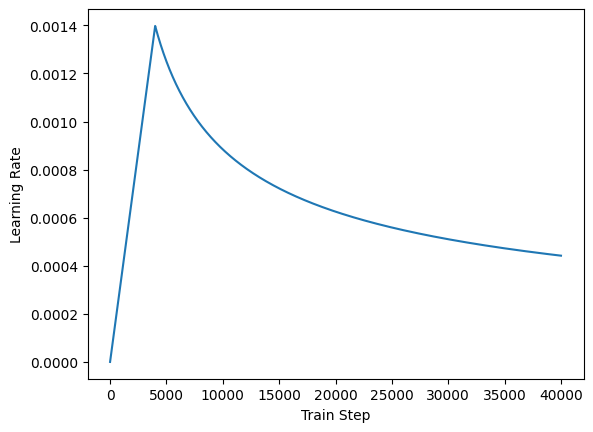

In [74]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

### 2.6.1. Loss

Let's define loss and accuracy function. We are using cross-entropy loss function using `tf.keras.losses.SparseCategoricalCrossentropy`:

In [75]:
def masked_loss(label, pred):
  """
  Calculates the masked sparse categorical cross-entropy loss between the true labels and predicted labels.

  Args:
      label: A tensor of shape (batch_size, seq_length) containing the true labels.
      pred: A tensor of shape (batch_size, seq_length, target_vocab_size) containing the predicted labels.

  Returns:
      A scalar tensor representing the masked loss value.

  """
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

The `masked_loss` function calculates the masked sparse categorical cross-entropy loss between the predicted values and the true labels. In this function, the `label` and `pred` inputs are the true labels and predicted values, respectively.

First, the function creates a boolean mask to exclude padded values (0's) from the loss calculation. Then, it defines the loss object as `SparseCategoricalCrossentropy` from `tf.keras.losses`, which computes the cross-entropy loss between the true and predicted labels.

The next step multiplies the loss by the mask to exclude any loss contribution from the padded values. The function then reduces the loss by computing the sum of the loss over the non-padded values and dividing it by the sum of the mask to obtain the average loss over non-padded values.

Now let's write a function to calculate accuracy:

In [76]:
def masked_accuracy(label, pred):
  """
  Calculates the masked accuracy between the true labels and predicted labels.

  Args:
      label: A tensor of shape (batch_size, seq_length) containing the true labels.
      pred: A tensor of shape (batch_size, seq_length, target_vocab_size) containing the predicted labels.

  Returns:
      A scalar tensor representing the masked accuracy value.

  """
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

The `masked_accuracy` function computes the masked accuracy of the predicted values given the true labels. The inputs of the function are `label` and `pred`, which are the true labels and predicted values, respectively.

First, the function uses `tf.argmax` to find the index of the maximum value in `pred` along the last dimension, which represents the predicted class. Then, the true labels label are cast to the same data type as the predicted values pred.

The function then creates a boolean mask to exclude padded values from the calculation. The function uses the & operator to compare the predicted and true labels and create a boolean matrix match. The values in match indicate whether the predicted and true labels match for non-padded values.

The match matrix and the mask matrix are then cast to `float32` and used to compute the average accuracy over non-padded values. The function returns the sum of match divided by the sum of mask.

### 2.6.3. Training

Now let's compile the model and use `model.fit` to train model! I use Colab A100 GPU!

In [77]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
transformer.fit(train_batches,
                epochs=20,
                validation_data=val_batches)

Epoch 1/20
451/810 [===============>..............] - ETA: 2:12 - loss: 7.4876 - masked_accuracy: 0.0865

## 2.7. Testing

Now we trained our model for 20 Epochs, let's try to use this model for translating! For this, let's write `Translator` class.

`Translator` takes `tokenizers` and `transformer` as inputs in its constructor. It has a `__call__` method that takes a sentence in Portuguese and translates it to English using the transformer model.

The input sentence is first tokenized using the Portuguese tokenizer and converted to a tensor. The encoder input is set to be the tokenized sentence.

The English `[START]` token is added to the output to initialize it. The output is stored in a `tf.TensorArray`.

For each token in the output, the transformer model is called with the encoder input and the current output. The last token from the `seq_len` dimension of the predictions is selected and appended to the output. If the last token is the `[END]` token, the loop is terminated. The output is converted to text using the English tokenizer and returned along with the attention weights.

In [ ]:
class Translator(tf.Module):
  """A translator that uses a transformer model to translate
  sentences from Portuguese to English.

  Attributes:
      tokenizers (dict): A dictionary of tokenizers for the
      Portuguese and English languages.
      transformer (tf.keras.Model): A transformer model that can
      be used for sequence-to-sequence translation.
  """
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    """Translates a sentence from Portuguese to English.

    Args:
        sentence (str): The sentence to be translated.
        max_length (int): The maximum number of tokens in the output sentence.

    Returns:
        tuple: A tuple containing the translated text, the tokens of the translated text,
            and the attention weights of the transformer model.
    """
    # The input sentence is Portuguese, hence adding the `[START]` and `[END]` tokens.
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.pt.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output language is English, initialize the output with the
    # English `[START]` token.
    start_end = self.tokenizers.en.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # The output shape is `(1, tokens)`.
    text = tokenizers.en.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.en.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

Create an instance of this `Translator` class, and try it out a few times:

In [ ]:
translator = Translator(tokenizers, transformer)

Let's wrrite a function to translate sentences for us:

In [ ]:
def print_translation(sentence, tokens, ground_truth):
  """
  The print_translation function takes in three arguments: sentence, tokens,
  and ground_truth and prints out the input sentence, the predicted translation
  and the ground truth translation.

  Args:

    sentence: A string that represents the input sentence.
    tokens: A tensor of integers that represents the predicted translation.
    ground_truth: A string that represents the ground truth translation.

  Returns:
    This function doesn't return anything, it just prints out the input sentence,
    predicted translation and ground truth translation in a specific format.
  """
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

We can also write a function to return attention wights. Let's write that!

In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  """
  Plots the attention weights for a single head of the attention mechanism.

  Args:
  - in_tokens: a tensor of shape (in_seq_length,) containing the input tokens.
  - translated_tokens: a tensor of shape (out_seq_length,) containing the translated tokens.
  - attention: a tensor of shape (out_seq_length, in_seq_length) containing the attention weights.

  Returns:
  None.
  """
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
 def plot_attention_weights(sentence, translated_tokens, attention_heads):
  """
  Plots the attention weights for each head of the transformer model.

  Args:
      sentence (str): The input sentence in Portuguese.
      translated_tokens (tf.Tensor): The translated tokens in English.
      attention_heads (list): The attention heads of the transformer model.

  Returns:
      None
  """
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.pt.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()



`plot_attention_weights` is a function that plots the attention weights of all the attention heads in a multi-head attention mechanism. It takes in the input sentence, the translated output tokens, and the attention weights and creates a figure where each subplot represents one attention head.

`plot_attention_head` is a helper function used by `plot_attention_weights`. It takes in the input tokens, the output tokens, and the attention matrix of a single attention head and plots a heatmap where the x-axis represents the input tokens and the y-axis represents the output tokens. It is called once for each attention head to create the subplots in the `plot_attention_weights` figure.

now let's put togheter some sentences to test:

Input:         : Eu amo programar em Python.
Prediction     : i love to code in python .
Ground truth   : I love programming in Python.


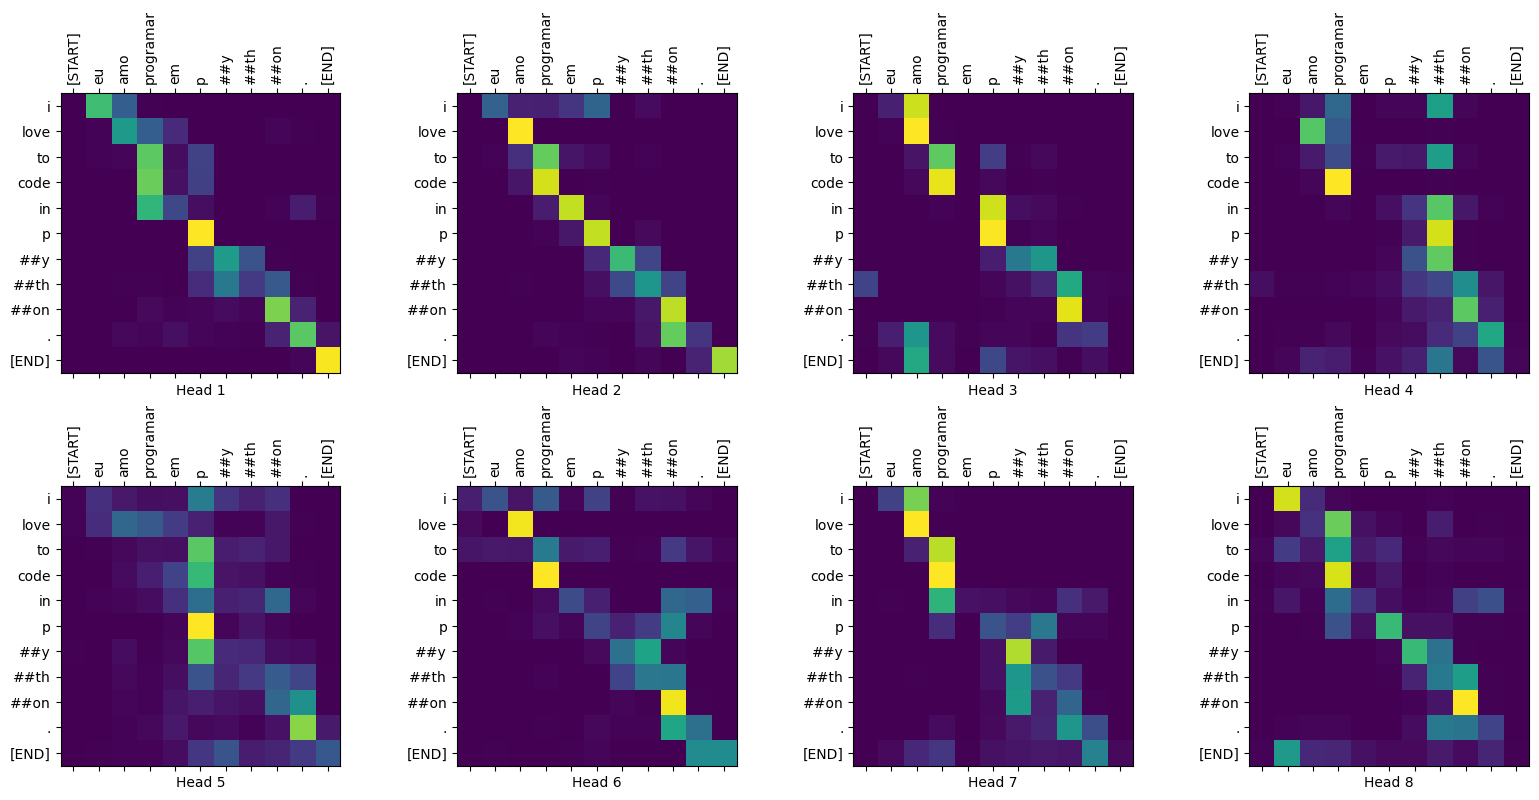

In [ ]:
sentence = 'Eu amo programar em Python.'
ground_truth = 'I love programming in Python.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : O tempo está ótimo para uma caminhada no parque.
Prediction     : time is great for a walk into the park .
Ground truth   : The weather is great for a walk in the park.


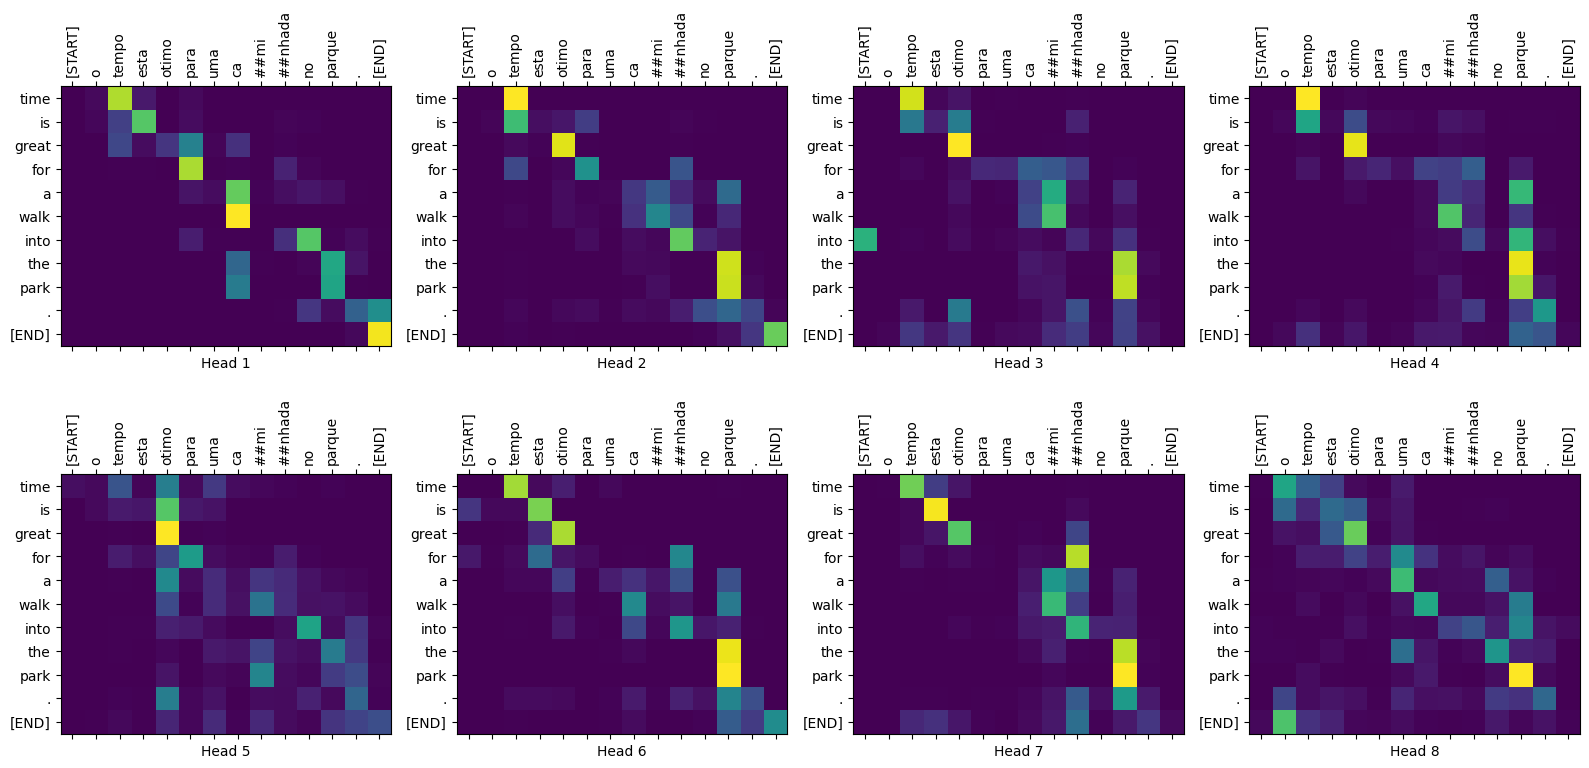

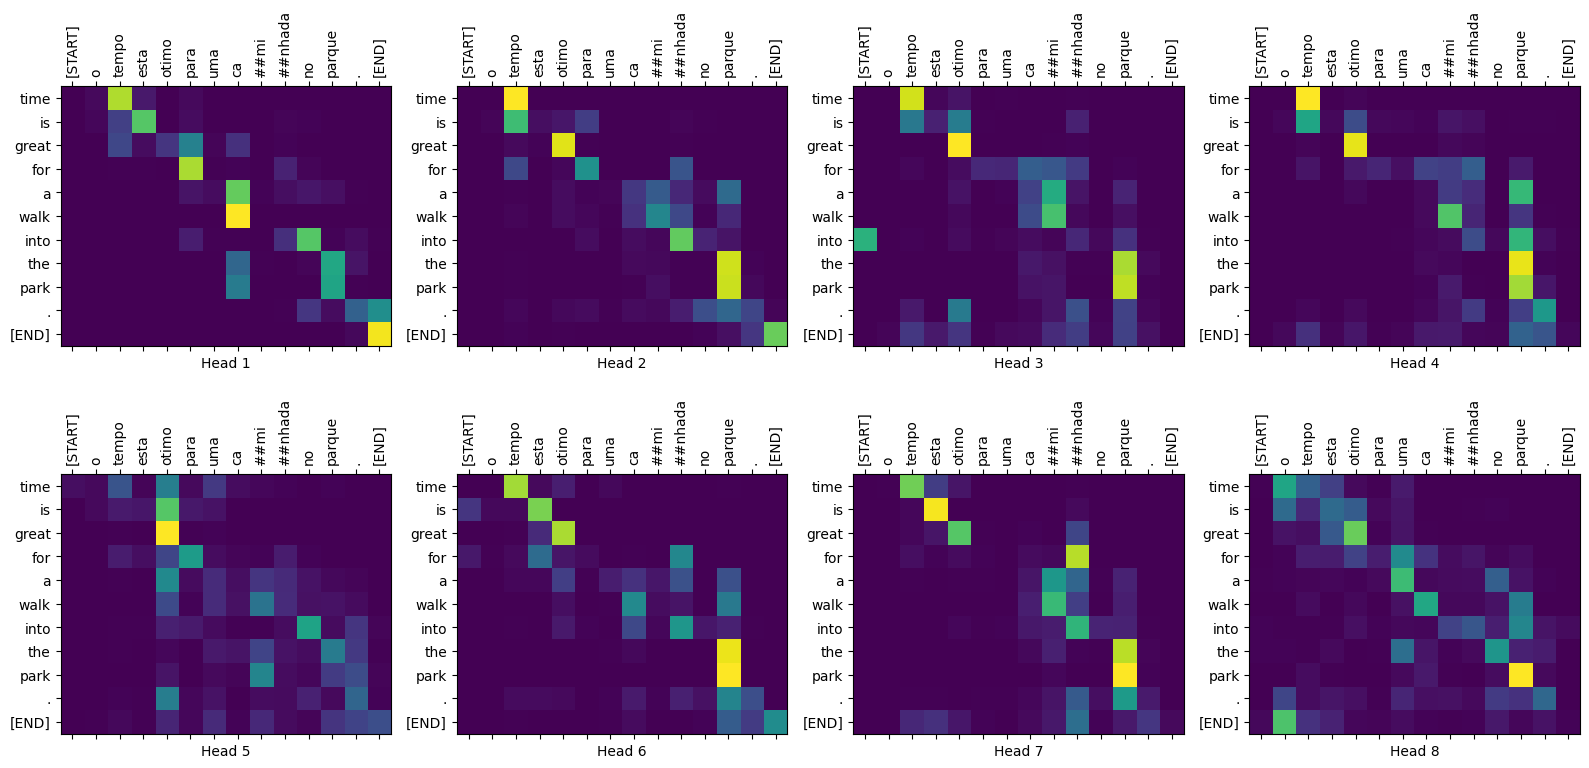

In [ ]:
sentence = 'O tempo está ótimo para uma caminhada no parque.'
ground_truth = 'The weather is great for a walk in the park.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : Eu preciso comprar pão e leite na padaria.
Prediction     : i need to buy bread and milk in parrio .
Ground truth   : I need to buy bread and milk at the bakery.


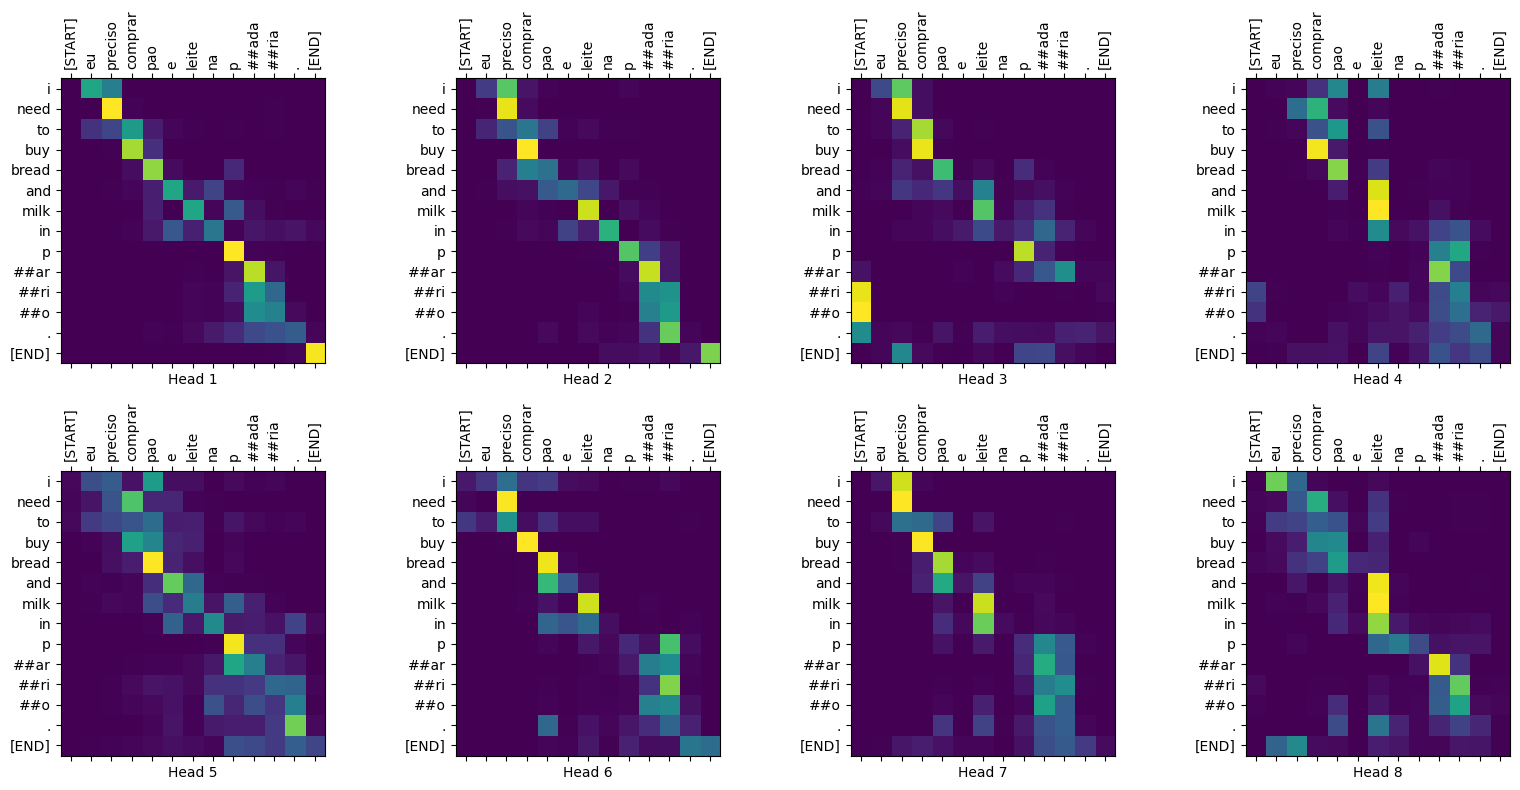

In [ ]:
sentence = 'Eu preciso comprar pão e leite na padaria.'
ground_truth = "I need to buy bread and milk at the bakery."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.
Prediction     : technology has changed deeply the way we live and work .
Ground truth   : Technology has profoundly transformed the way we live and work.


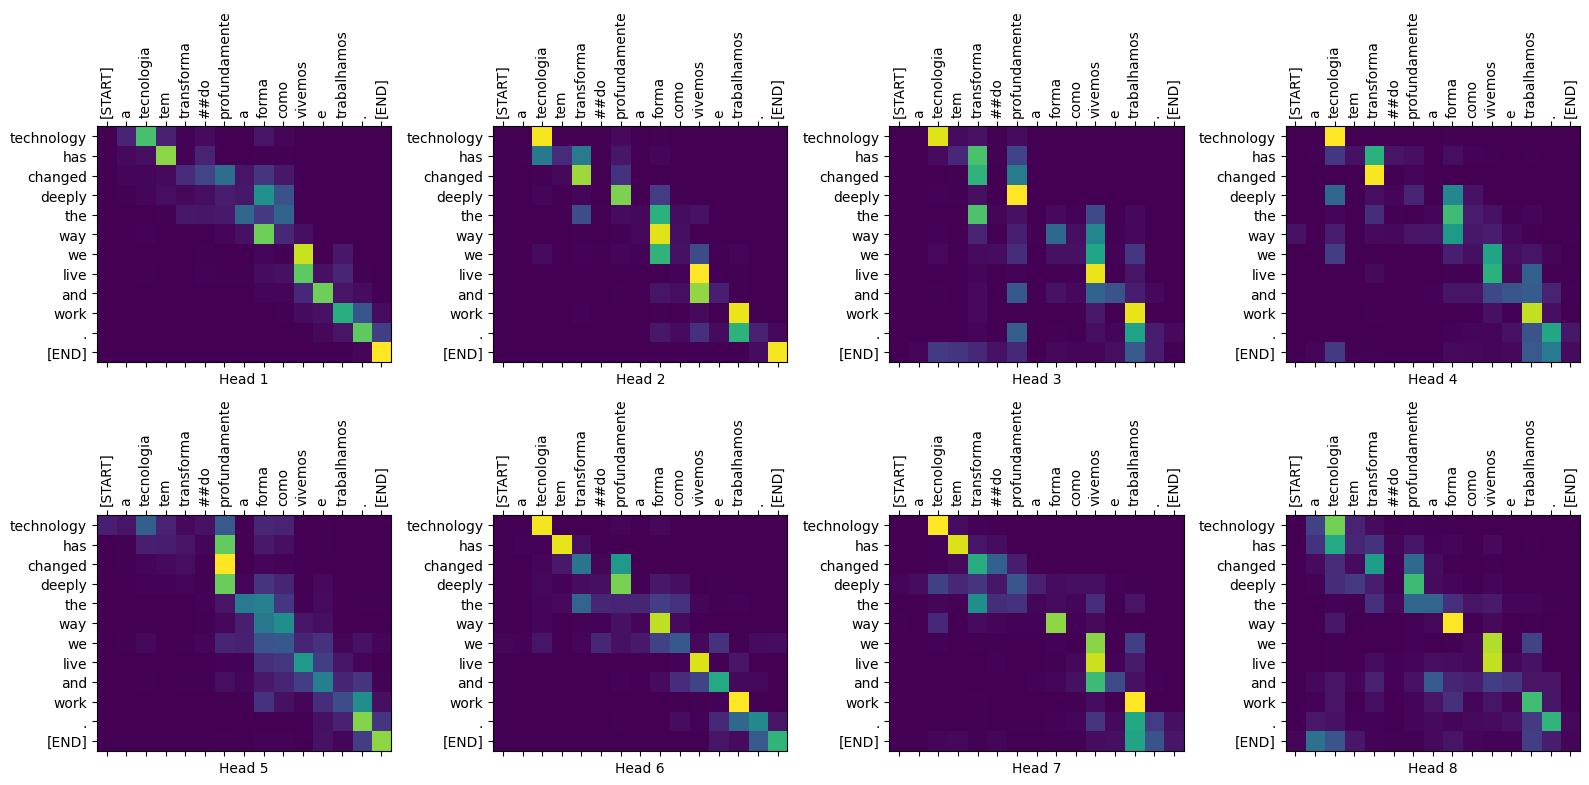

In [ ]:
sentence = 'A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.'
ground_truth = "Technology has profoundly transformed the way we live and work."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : A pandemia de COVID-19 teve um impacto devastador na economia global.
Prediction     : pandemic devi ' s promotes a devastating impact on global economy .
Ground truth   : The COVID-19 pandemic has had a devastating impact on the global economy.


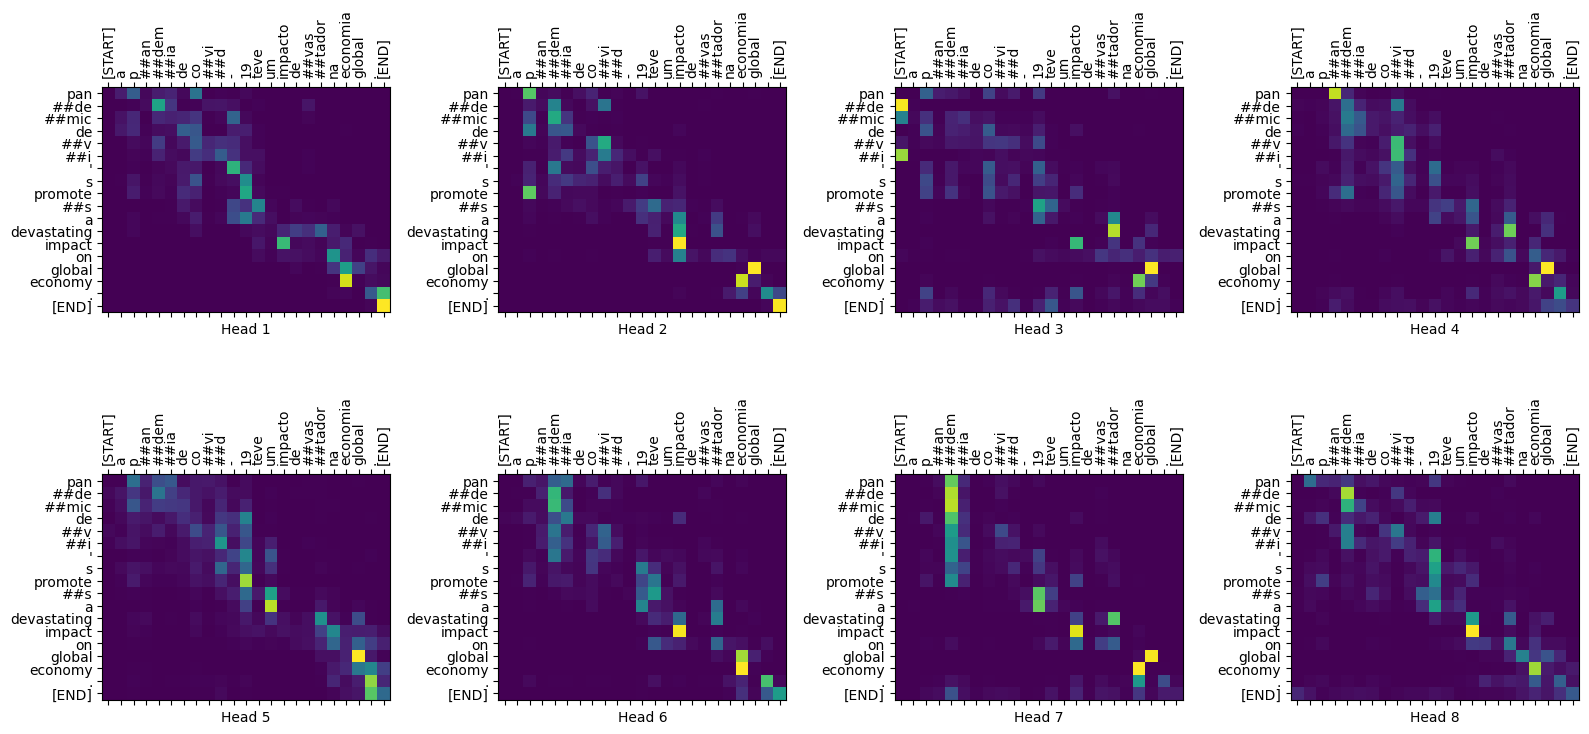

In [ ]:
sentence = 'A pandemia de COVID-19 teve um impacto devastador na economia global.'
ground_truth = "The COVID-19 pandemic has had a devastating impact on the global economy."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

## 2.8. Export the model

For this, let's create class called `ExportTranslator`, then wrap `translator` in the ExportTranslator:

In [ ]:
class ExportTranslator(tf.Module):
  """
  A class for exporting a trained Translator model as a `tf.Module` for inference.

  Args:
  translator (Translator): A trained instance of the Translator class.

  Methods:
  __call__(self, sentence):
      Translates the input sentence to the target language and returns the translation.
  """
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    """
    Translates the input sentence to the target language and returns the translation.

    Args:
    sentence (tf.string): The input sentence to translate.

    Returns:
    A string tensor representing the translated sentence.

    """
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

`ExportTranslator` class takes a `translator` object as input and exports it as a TensorFlow module. It has a `__call__` method that takes a single string argument sentence and returns the translation result of the translator object for that input sentence.

The `__call__` method is decorated with `tf.function` and `input_signature` that specify the data type and shape of the input tensor. The sentence tensor has an empty shape and string data type. The `__call__` method calls the translator object with the input sentence and max_length argument set to MAX_TOKENS, and returns the translation result as a tensor.

In [ ]:
translator = ExportTranslator(translator)

Since the model is decoding the predictions using `tf.argmax` the predictions are deterministic. The original model and one reloaded from its `SavedModel` should give identical predictions:

In [ ]:
translator('Eu amo programar em Python.').numpy()

b'i love to code in python .'

Now we can use `.save` method to save model!

In [ ]:
tf.saved_model.save(translator, export_dir='translator')

We can reload model and test the prediction!

In [ ]:
reloaded_translator = tf.saved_model.load('translator')

In [ ]:
reloaded_translator('Eu amo programar em Python.').numpy()

b'i love to code in python .'

## 2.9. Experimenting with the Model

Unfortunately, I don't have access to a lot of computing power, but it would be ideal to train the model for more epochs. I have tested the model with more than 20 epochs, so let's take a look at the results here for model with 50 more epochs and compare the results!

In [ ]:
transformer.fit(train_batches,
                epochs=50,
                validation_data=val_batches)

Epoch 1/50
810/810 [==============================] - 46s 56ms/step - loss: 1.2290 - masked_accuracy: 0.7155 - val_loss: 2.0777 - val_masked_accuracy: 0.6276
Epoch 2/50
810/810 [==============================] - 46s 57ms/step - loss: 1.1964 - masked_accuracy: 0.7213 - val_loss: 2.0961 - val_masked_accuracy: 0.6291
Epoch 3/50
810/810 [==============================] - 47s 57ms/step - loss: 1.1676 - masked_accuracy: 0.7255 - val_loss: 2.0876 - val_masked_accuracy: 0.6302
Epoch 4/50
810/810 [==============================] - 46s 57ms/step - loss: 1.1392 - masked_accuracy: 0.7301 - val_loss: 2.0891 - val_masked_accuracy: 0.6294
Epoch 5/50
810/810 [==============================] - 46s 57ms/step - loss: 1.1140 - masked_accuracy: 0.7346 - val_loss: 2.1056 - val_masked_accuracy: 0.6277
Epoch 6/50
810/810 [==============================] - 46s 57ms/step - loss: 1.0895 - masked_accuracy: 0.7391 - val_loss: 2.1056 - val_masked_accuracy: 0.6292
Epoch 7/50
810/810 [==============================] 

In [ ]:
translator = Translator(tokenizers, transformer)

Input:         : Eu amo programar em Python.
Prediction     : i love programming in python .
Ground truth   : I love programming in Python.


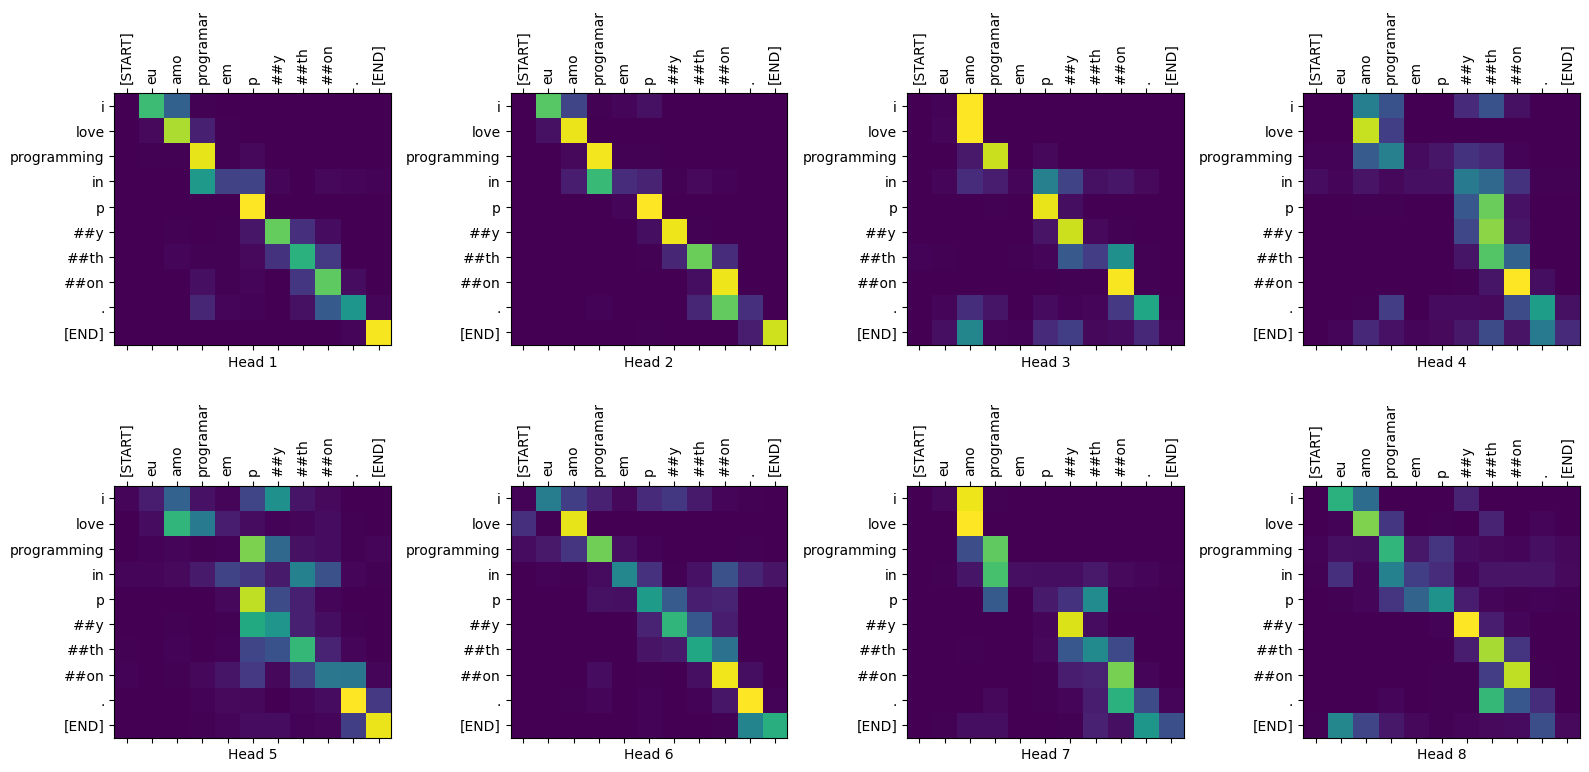

In [ ]:
sentence = 'Eu amo programar em Python.'
ground_truth = 'I love programming in Python.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : O tempo está ótimo para uma caminhada no parque.
Prediction     : time is great for a walk in a park .
Ground truth   : The weather is great for a walk in the park.


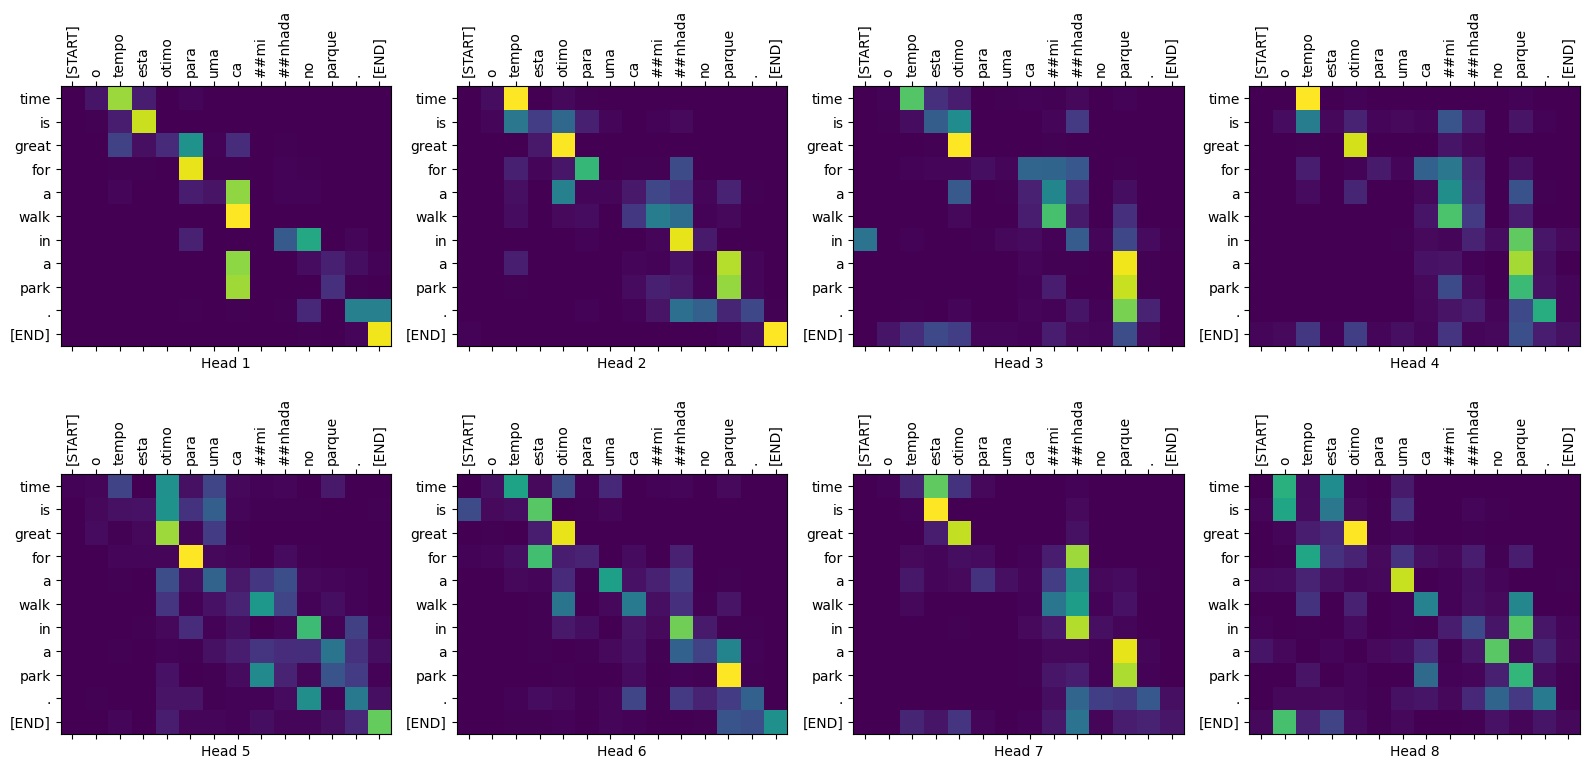

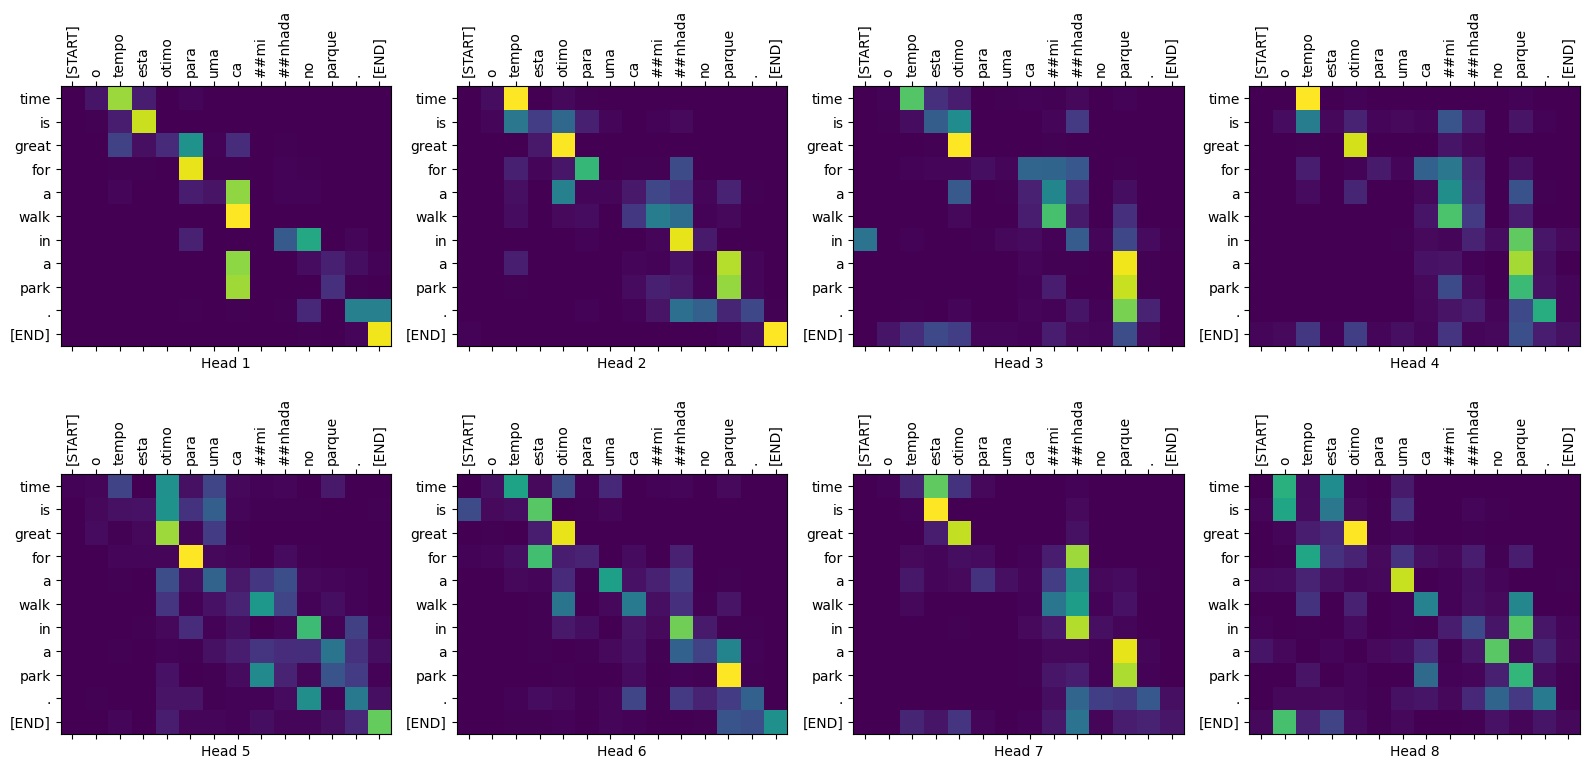

In [ ]:
sentence = 'O tempo está ótimo para uma caminhada no parque.'
ground_truth = 'The weather is great for a walk in the park.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : Eu preciso comprar pão e leite na padaria.
Prediction     : i need to buy bread and milk in pricaline .
Ground truth   : I need to buy bread and milk at the bakery.


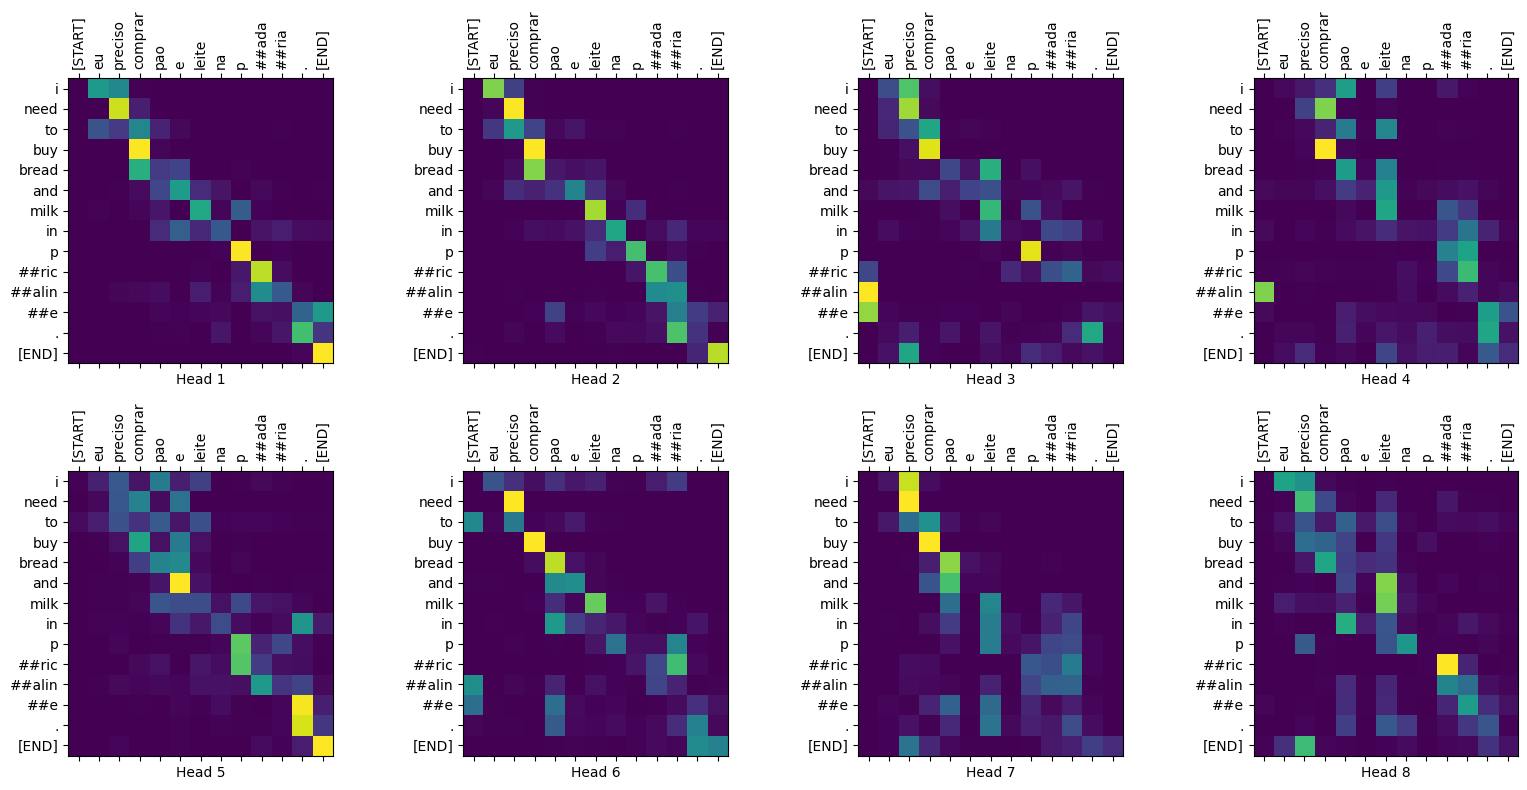

In [ ]:
sentence = 'Eu preciso comprar pão e leite na padaria.'
ground_truth = "I need to buy bread and milk at the bakery."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.
Prediction     : and technology has been converted deeply to how we live and work .
Ground truth   : Technology has profoundly transformed the way we live and work.


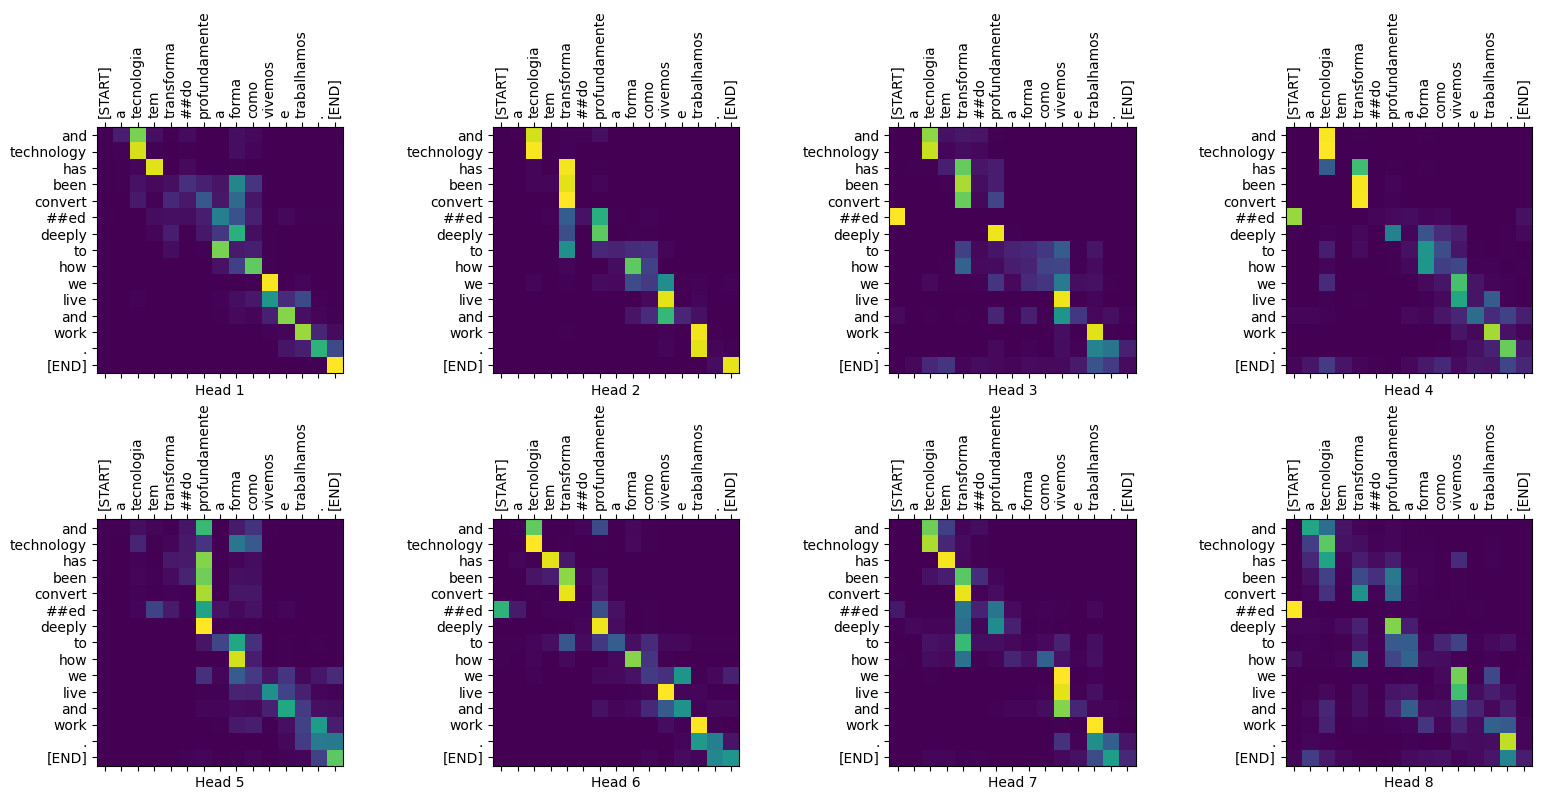

In [ ]:
sentence = 'A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.'
ground_truth = "Technology has profoundly transformed the way we live and work."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Input:         : A pandemia de COVID-19 teve um impacto devastador na economia global.
Prediction     : pandemic ' s tidower has been a global impact on global economy .
Ground truth   : The COVID-19 pandemic has had a devastating impact on the global economy.


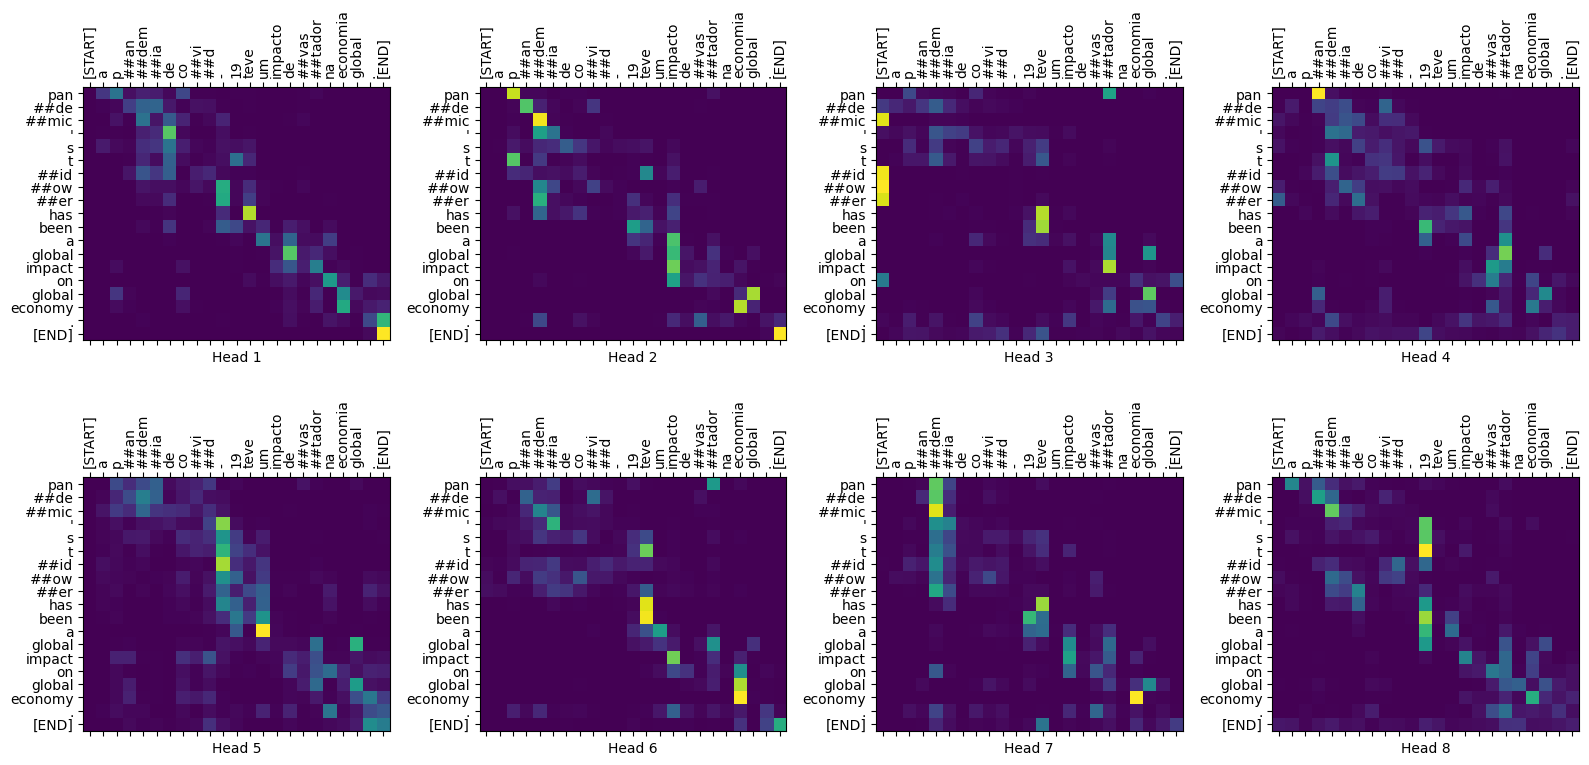

In [ ]:
sentence = 'A pandemia de COVID-19 teve um impacto devastador na economia global.'
ground_truth = "The COVID-19 pandemic has had a devastating impact on the global economy."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Let's export model.

In [ ]:
translator = ExportTranslator(translator)
tf.saved_model.save(translator, export_dir='translator_70')

So it seems we have slightly better translation!

> **Final Note before goodbye:** This tutorial is heavily based on [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer). I tried to make the explanation clear and adapt it based on my student taking this series of courses! I highly recommend going through the main material!

## References

[1] Vaswani, Ashish, et al. "Attention is all you need." Advances in neural information processing systems 30 (2017).

[2] [https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4](https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4)

[3] [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer)


